In [2]:
import json

import numpy as np
from pyESN import ESN, optimal_esn
from matplotlib import pyplot as plt
%matplotlib inline

with open('new_ts.json', 'r') as f:
    d = json.load(f)
data = np.array(d['timeseries'])[::10, :]
trainlen = 15000
synclen = 10
predlen = 300
testlen = synclen + predlen
test_timeseries_set = [data[i*testlen: (i+1)*testlen] for i in range(3)]
training_timeseries = data[4*testlen:4*testlen + trainlen]

# Section 1. Training with laminarisation event

In [3]:
import pickle
with open('esn_better', 'rb') as f:
    esn = pickle.load(f)


In [4]:
import sys
sys.path.append('/home/tony/projects/anton-pershin/reducedmodels')
from reducedmodels.transition_to_turbulence import MoehlisFaisstEckhardtModel

m = MoehlisFaisstEckhardtModel(Re=500, L_x=1.75 * np.pi, L_z=1.2 * np.pi)

## Section 1.1. Comparison of long-term trajectory prediction

In [16]:
from scipy.stats import wasserstein_distance

esn.synchronize(np.ones(synclen), training_timeseries[:synclen])
prediction_for_stats = esn.predict(np.ones(trainlen - synclen))
ke = m.kinetic_energy(prediction_for_stats)
ke_original = m.kinetic_energy(training_timeseries[synclen:, :])
print(f'Wasserstein distance = {wasserstein_distance(ke, ke_original)}')

Wasserstein distance = 2.3962946906526756


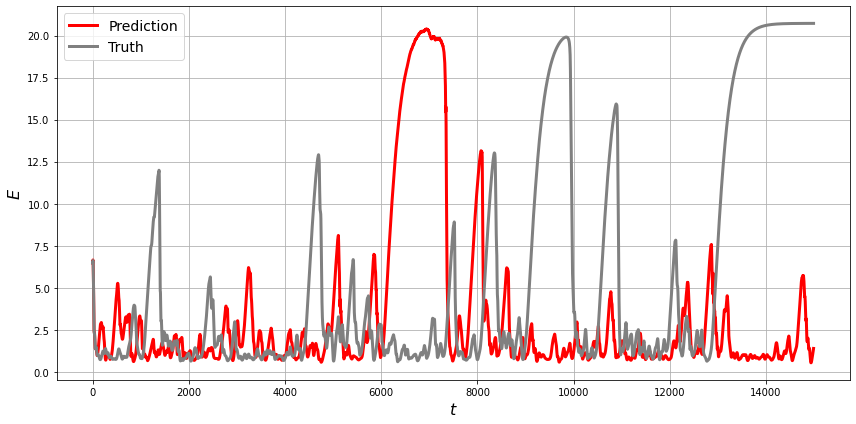

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(range(len(ke)), ke, color='red', linewidth=3, label='Prediction')
ax.plot(range(len(ke_original)), ke_original, color='gray', linewidth=3, label='Truth')
ax.set_xlabel(r'$t$', fontsize=16)
ax.set_ylabel(r'$E$', fontsize=16)
ax.legend(fontsize=14)
ax.grid()
plt.tight_layout()
#plt.savefig('long_term_prediction_on_training_set.png', dpi=200)
plt.show()

## Section 1.2. Phase space comparison

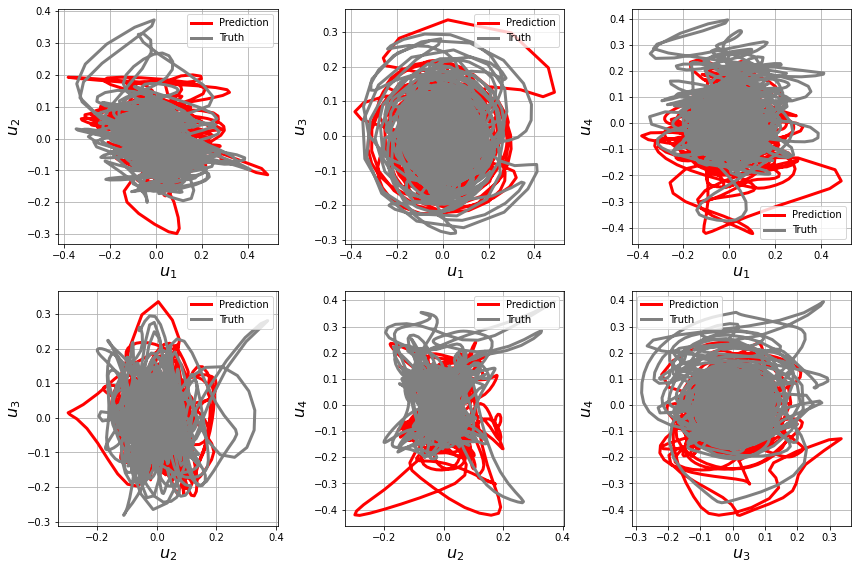

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
#fig = plt.figure(figsize=(12, 8))
#gs = fig.add_gridspec(2, 3)
#axes_amps = [fig.add_subplot(gs[int(i//3), i - int(i//3)*3]) for i in range(6)]
training_for_stats = training_timeseries[synclen:-2000, :]
prediction_for_stats_no_lam = prediction_for_stats[:-2000, :]
n = 0
for i in range(3):
    for j in range(i + 1, 4):
        row = int(n//3)
        col = n - int(n//3) * 3
        axes[row][col].plot(prediction_for_stats_no_lam[:, i+1], prediction_for_stats_no_lam[:, j+1], color='red', linewidth=3, label='Prediction')
        axes[row][col].plot(training_for_stats[:, i+1], training_for_stats[:, j+1], color='gray', linewidth=3, label='Truth')
        axes[row][col].set_xlabel(f'$u_{i+1}$', fontsize=16)
        axes[row][col].set_ylabel(f'$u_{j+1}$', fontsize=16)
        axes[row][col].legend()
        axes[row][col].grid()
        n += 1
plt.tight_layout(pad=1)
plt.savefig('phase_space.png', dpi=200)
#gs.tight_layout(fig, rect=[0, 0, 1.5, 1.5])

plt.show()

## Section 1.3. Correlation dimension

Here I am using Grassberger--Procaccia algorithm (http://www.scholarpedia.org/article/Grassberger-Procaccia_algorithm). First, I am calculating the correlation sum $\hat{C}(r) = \dfrac{2}{N(N-1)} \sum\limits_{i < j} \theta(r - ||\boldsymbol{x}_i - \boldsymbol{x}_j||_2)$ which is an unbiased estimator of the correlation integral $C(r)$. Here $||\cdot||_2$ defines the distance and $\theta(x)$ is the Heaviside step function. If $C(r)$ decreases like a power law $C(r) \sim r^D$, then $D$ is called the correlation dimension.

In [11]:
def correlation_sum(timeseries):
    N = timeseries.shape[0]
    dist = lambda x1, x2: np.linalg.norm(x1 - x2)
    r_values = np.logspace(-2, 0, 6)
    C_values = np.zeros_like(r_values)
    for r_i, r in enumerate(r_values):
        print(f'Compute r = {r}')
        sum_ = 0.
        for i in range(N):
            print(f'\ti = {i}')
            for j in range(i+1, N):
                sum_ += np.heaviside(r - dist(timeseries[i, :], timeseries[j, :]), 1)
        C_values[r_i] = 2./(N*(N-1)) * sum_
    return r_values, C_values

In [13]:
#r_values, C_values = correlation_sum(data[:12500])
r_values, C_values = correlation_sum(data[:5000])

Compute r = 0.01
	i = 0
	i = 1
	i = 2
	i = 3
	i = 4
	i = 5
	i = 6
	i = 7
	i = 8
	i = 9
	i = 10
	i = 11
	i = 12
	i = 13
	i = 14
	i = 15
	i = 16
	i = 17
	i = 18
	i = 19
	i = 20
	i = 21
	i = 22
	i = 23
	i = 24
	i = 25
	i = 26
	i = 27
	i = 28
	i = 29
	i = 30
	i = 31
	i = 32
	i = 33
	i = 34
	i = 35
	i = 36
	i = 37
	i = 38
	i = 39
	i = 40
	i = 41
	i = 42
	i = 43
	i = 44
	i = 45
	i = 46
	i = 47
	i = 48
	i = 49
	i = 50
	i = 51
	i = 52
	i = 53
	i = 54
	i = 55
	i = 56
	i = 57
	i = 58
	i = 59
	i = 60
	i = 61
	i = 62
	i = 63
	i = 64
	i = 65
	i = 66
	i = 67
	i = 68
	i = 69
	i = 70
	i = 71
	i = 72
	i = 73
	i = 74
	i = 75
	i = 76
	i = 77
	i = 78
	i = 79
	i = 80
	i = 81
	i = 82
	i = 83
	i = 84
	i = 85
	i = 86
	i = 87
	i = 88
	i = 89
	i = 90
	i = 91
	i = 92
	i = 93
	i = 94
	i = 95
	i = 96
	i = 97
	i = 98
	i = 99
	i = 100
	i = 101
	i = 102
	i = 103
	i = 104
	i = 105
	i = 106
	i = 107
	i = 108
	i = 109
	i = 110
	i = 111
	i = 112
	i = 113
	i = 114
	i = 115
	i = 116
	i = 117
	i = 118
	i = 119
	i = 120
	i =

	i = 922
	i = 923
	i = 924
	i = 925
	i = 926
	i = 927
	i = 928
	i = 929
	i = 930
	i = 931
	i = 932
	i = 933
	i = 934
	i = 935
	i = 936
	i = 937
	i = 938
	i = 939
	i = 940
	i = 941
	i = 942
	i = 943
	i = 944
	i = 945
	i = 946
	i = 947
	i = 948
	i = 949
	i = 950
	i = 951
	i = 952
	i = 953
	i = 954
	i = 955
	i = 956
	i = 957
	i = 958
	i = 959
	i = 960
	i = 961
	i = 962
	i = 963
	i = 964
	i = 965
	i = 966
	i = 967
	i = 968
	i = 969
	i = 970
	i = 971
	i = 972
	i = 973
	i = 974
	i = 975
	i = 976
	i = 977
	i = 978
	i = 979
	i = 980
	i = 981
	i = 982
	i = 983
	i = 984
	i = 985
	i = 986
	i = 987
	i = 988
	i = 989
	i = 990
	i = 991
	i = 992
	i = 993
	i = 994
	i = 995
	i = 996
	i = 997
	i = 998
	i = 999
	i = 1000
	i = 1001
	i = 1002
	i = 1003
	i = 1004
	i = 1005
	i = 1006
	i = 1007
	i = 1008
	i = 1009
	i = 1010
	i = 1011
	i = 1012
	i = 1013
	i = 1014
	i = 1015
	i = 1016
	i = 1017
	i = 1018
	i = 1019
	i = 1020
	i = 1021
	i = 1022
	i = 1023
	i = 1024
	i = 1025
	i = 1026
	i = 1027
	i = 1028
	i = 102

	i = 1760
	i = 1761
	i = 1762
	i = 1763
	i = 1764
	i = 1765
	i = 1766
	i = 1767
	i = 1768
	i = 1769
	i = 1770
	i = 1771
	i = 1772
	i = 1773
	i = 1774
	i = 1775
	i = 1776
	i = 1777
	i = 1778
	i = 1779
	i = 1780
	i = 1781
	i = 1782
	i = 1783
	i = 1784
	i = 1785
	i = 1786
	i = 1787
	i = 1788
	i = 1789
	i = 1790
	i = 1791
	i = 1792
	i = 1793
	i = 1794
	i = 1795
	i = 1796
	i = 1797
	i = 1798
	i = 1799
	i = 1800
	i = 1801
	i = 1802
	i = 1803
	i = 1804
	i = 1805
	i = 1806
	i = 1807
	i = 1808
	i = 1809
	i = 1810
	i = 1811
	i = 1812
	i = 1813
	i = 1814
	i = 1815
	i = 1816
	i = 1817
	i = 1818
	i = 1819
	i = 1820
	i = 1821
	i = 1822
	i = 1823
	i = 1824
	i = 1825
	i = 1826
	i = 1827
	i = 1828
	i = 1829
	i = 1830
	i = 1831
	i = 1832
	i = 1833
	i = 1834
	i = 1835
	i = 1836
	i = 1837
	i = 1838
	i = 1839
	i = 1840
	i = 1841
	i = 1842
	i = 1843
	i = 1844
	i = 1845
	i = 1846
	i = 1847
	i = 1848
	i = 1849
	i = 1850
	i = 1851
	i = 1852
	i = 1853
	i = 1854
	i = 1855
	i = 1856
	i = 1857
	i = 1858
	i = 1859


	i = 2585
	i = 2586
	i = 2587
	i = 2588
	i = 2589
	i = 2590
	i = 2591
	i = 2592
	i = 2593
	i = 2594
	i = 2595
	i = 2596
	i = 2597
	i = 2598
	i = 2599
	i = 2600
	i = 2601
	i = 2602
	i = 2603
	i = 2604
	i = 2605
	i = 2606
	i = 2607
	i = 2608
	i = 2609
	i = 2610
	i = 2611
	i = 2612
	i = 2613
	i = 2614
	i = 2615
	i = 2616
	i = 2617
	i = 2618
	i = 2619
	i = 2620
	i = 2621
	i = 2622
	i = 2623
	i = 2624
	i = 2625
	i = 2626
	i = 2627
	i = 2628
	i = 2629
	i = 2630
	i = 2631
	i = 2632
	i = 2633
	i = 2634
	i = 2635
	i = 2636
	i = 2637
	i = 2638
	i = 2639
	i = 2640
	i = 2641
	i = 2642
	i = 2643
	i = 2644
	i = 2645
	i = 2646
	i = 2647
	i = 2648
	i = 2649
	i = 2650
	i = 2651
	i = 2652
	i = 2653
	i = 2654
	i = 2655
	i = 2656
	i = 2657
	i = 2658
	i = 2659
	i = 2660
	i = 2661
	i = 2662
	i = 2663
	i = 2664
	i = 2665
	i = 2666
	i = 2667
	i = 2668
	i = 2669
	i = 2670
	i = 2671
	i = 2672
	i = 2673
	i = 2674
	i = 2675
	i = 2676
	i = 2677
	i = 2678
	i = 2679
	i = 2680
	i = 2681
	i = 2682
	i = 2683
	i = 2684


	i = 3412
	i = 3413
	i = 3414
	i = 3415
	i = 3416
	i = 3417
	i = 3418
	i = 3419
	i = 3420
	i = 3421
	i = 3422
	i = 3423
	i = 3424
	i = 3425
	i = 3426
	i = 3427
	i = 3428
	i = 3429
	i = 3430
	i = 3431
	i = 3432
	i = 3433
	i = 3434
	i = 3435
	i = 3436
	i = 3437
	i = 3438
	i = 3439
	i = 3440
	i = 3441
	i = 3442
	i = 3443
	i = 3444
	i = 3445
	i = 3446
	i = 3447
	i = 3448
	i = 3449
	i = 3450
	i = 3451
	i = 3452
	i = 3453
	i = 3454
	i = 3455
	i = 3456
	i = 3457
	i = 3458
	i = 3459
	i = 3460
	i = 3461
	i = 3462
	i = 3463
	i = 3464
	i = 3465
	i = 3466
	i = 3467
	i = 3468
	i = 3469
	i = 3470
	i = 3471
	i = 3472
	i = 3473
	i = 3474
	i = 3475
	i = 3476
	i = 3477
	i = 3478
	i = 3479
	i = 3480
	i = 3481
	i = 3482
	i = 3483
	i = 3484
	i = 3485
	i = 3486
	i = 3487
	i = 3488
	i = 3489
	i = 3490
	i = 3491
	i = 3492
	i = 3493
	i = 3494
	i = 3495
	i = 3496
	i = 3497
	i = 3498
	i = 3499
	i = 3500
	i = 3501
	i = 3502
	i = 3503
	i = 3504
	i = 3505
	i = 3506
	i = 3507
	i = 3508
	i = 3509
	i = 3510
	i = 3511


	i = 4247
	i = 4248
	i = 4249
	i = 4250
	i = 4251
	i = 4252
	i = 4253
	i = 4254
	i = 4255
	i = 4256
	i = 4257
	i = 4258
	i = 4259
	i = 4260
	i = 4261
	i = 4262
	i = 4263
	i = 4264
	i = 4265
	i = 4266
	i = 4267
	i = 4268
	i = 4269
	i = 4270
	i = 4271
	i = 4272
	i = 4273
	i = 4274
	i = 4275
	i = 4276
	i = 4277
	i = 4278
	i = 4279
	i = 4280
	i = 4281
	i = 4282
	i = 4283
	i = 4284
	i = 4285
	i = 4286
	i = 4287
	i = 4288
	i = 4289
	i = 4290
	i = 4291
	i = 4292
	i = 4293
	i = 4294
	i = 4295
	i = 4296
	i = 4297
	i = 4298
	i = 4299
	i = 4300
	i = 4301
	i = 4302
	i = 4303
	i = 4304
	i = 4305
	i = 4306
	i = 4307
	i = 4308
	i = 4309
	i = 4310
	i = 4311
	i = 4312
	i = 4313
	i = 4314
	i = 4315
	i = 4316
	i = 4317
	i = 4318
	i = 4319
	i = 4320
	i = 4321
	i = 4322
	i = 4323
	i = 4324
	i = 4325
	i = 4326
	i = 4327
	i = 4328
	i = 4329
	i = 4330
	i = 4331
	i = 4332
	i = 4333
	i = 4334
	i = 4335
	i = 4336
	i = 4337
	i = 4338
	i = 4339
	i = 4340
	i = 4341
	i = 4342
	i = 4343
	i = 4344
	i = 4345
	i = 4346


	i = 84
	i = 85
	i = 86
	i = 87
	i = 88
	i = 89
	i = 90
	i = 91
	i = 92
	i = 93
	i = 94
	i = 95
	i = 96
	i = 97
	i = 98
	i = 99
	i = 100
	i = 101
	i = 102
	i = 103
	i = 104
	i = 105
	i = 106
	i = 107
	i = 108
	i = 109
	i = 110
	i = 111
	i = 112
	i = 113
	i = 114
	i = 115
	i = 116
	i = 117
	i = 118
	i = 119
	i = 120
	i = 121
	i = 122
	i = 123
	i = 124
	i = 125
	i = 126
	i = 127
	i = 128
	i = 129
	i = 130
	i = 131
	i = 132
	i = 133
	i = 134
	i = 135
	i = 136
	i = 137
	i = 138
	i = 139
	i = 140
	i = 141
	i = 142
	i = 143
	i = 144
	i = 145
	i = 146
	i = 147
	i = 148
	i = 149
	i = 150
	i = 151
	i = 152
	i = 153
	i = 154
	i = 155
	i = 156
	i = 157
	i = 158
	i = 159
	i = 160
	i = 161
	i = 162
	i = 163
	i = 164
	i = 165
	i = 166
	i = 167
	i = 168
	i = 169
	i = 170
	i = 171
	i = 172
	i = 173
	i = 174
	i = 175
	i = 176
	i = 177
	i = 178
	i = 179
	i = 180
	i = 181
	i = 182
	i = 183
	i = 184
	i = 185
	i = 186
	i = 187
	i = 188
	i = 189
	i = 190
	i = 191
	i = 192
	i = 193
	i = 194
	i = 195
	i = 196

	i = 998
	i = 999
	i = 1000
	i = 1001
	i = 1002
	i = 1003
	i = 1004
	i = 1005
	i = 1006
	i = 1007
	i = 1008
	i = 1009
	i = 1010
	i = 1011
	i = 1012
	i = 1013
	i = 1014
	i = 1015
	i = 1016
	i = 1017
	i = 1018
	i = 1019
	i = 1020
	i = 1021
	i = 1022
	i = 1023
	i = 1024
	i = 1025
	i = 1026
	i = 1027
	i = 1028
	i = 1029
	i = 1030
	i = 1031
	i = 1032
	i = 1033
	i = 1034
	i = 1035
	i = 1036
	i = 1037
	i = 1038
	i = 1039
	i = 1040
	i = 1041
	i = 1042
	i = 1043
	i = 1044
	i = 1045
	i = 1046
	i = 1047
	i = 1048
	i = 1049
	i = 1050
	i = 1051
	i = 1052
	i = 1053
	i = 1054
	i = 1055
	i = 1056
	i = 1057
	i = 1058
	i = 1059
	i = 1060
	i = 1061
	i = 1062
	i = 1063
	i = 1064
	i = 1065
	i = 1066
	i = 1067
	i = 1068
	i = 1069
	i = 1070
	i = 1071
	i = 1072
	i = 1073
	i = 1074
	i = 1075
	i = 1076
	i = 1077
	i = 1078
	i = 1079
	i = 1080
	i = 1081
	i = 1082
	i = 1083
	i = 1084
	i = 1085
	i = 1086
	i = 1087
	i = 1088
	i = 1089
	i = 1090
	i = 1091
	i = 1092
	i = 1093
	i = 1094
	i = 1095
	i = 1096
	i = 1097
	i

	i = 2643
	i = 2644
	i = 2645
	i = 2646
	i = 2647
	i = 2648
	i = 2649
	i = 2650
	i = 2651
	i = 2652
	i = 2653
	i = 2654
	i = 2655
	i = 2656
	i = 2657
	i = 2658
	i = 2659
	i = 2660
	i = 2661
	i = 2662
	i = 2663
	i = 2664
	i = 2665
	i = 2666
	i = 2667
	i = 2668
	i = 2669
	i = 2670
	i = 2671
	i = 2672
	i = 2673
	i = 2674
	i = 2675
	i = 2676
	i = 2677
	i = 2678
	i = 2679
	i = 2680
	i = 2681
	i = 2682
	i = 2683
	i = 2684
	i = 2685
	i = 2686
	i = 2687
	i = 2688
	i = 2689
	i = 2690
	i = 2691
	i = 2692
	i = 2693
	i = 2694
	i = 2695
	i = 2696
	i = 2697
	i = 2698
	i = 2699
	i = 2700
	i = 2701
	i = 2702
	i = 2703
	i = 2704
	i = 2705
	i = 2706
	i = 2707
	i = 2708
	i = 2709
	i = 2710
	i = 2711
	i = 2712
	i = 2713
	i = 2714
	i = 2715
	i = 2716
	i = 2717
	i = 2718
	i = 2719
	i = 2720
	i = 2721
	i = 2722
	i = 2723
	i = 2724
	i = 2725
	i = 2726
	i = 2727
	i = 2728
	i = 2729
	i = 2730
	i = 2731
	i = 2732
	i = 2733
	i = 2734
	i = 2735
	i = 2736
	i = 2737
	i = 2738
	i = 2739
	i = 2740
	i = 2741
	i = 2742


	i = 3464
	i = 3465
	i = 3466
	i = 3467
	i = 3468
	i = 3469
	i = 3470
	i = 3471
	i = 3472
	i = 3473
	i = 3474
	i = 3475
	i = 3476
	i = 3477
	i = 3478
	i = 3479
	i = 3480
	i = 3481
	i = 3482
	i = 3483
	i = 3484
	i = 3485
	i = 3486
	i = 3487
	i = 3488
	i = 3489
	i = 3490
	i = 3491
	i = 3492
	i = 3493
	i = 3494
	i = 3495
	i = 3496
	i = 3497
	i = 3498
	i = 3499
	i = 3500
	i = 3501
	i = 3502
	i = 3503
	i = 3504
	i = 3505
	i = 3506
	i = 3507
	i = 3508
	i = 3509
	i = 3510
	i = 3511
	i = 3512
	i = 3513
	i = 3514
	i = 3515
	i = 3516
	i = 3517
	i = 3518
	i = 3519
	i = 3520
	i = 3521
	i = 3522
	i = 3523
	i = 3524
	i = 3525
	i = 3526
	i = 3527
	i = 3528
	i = 3529
	i = 3530
	i = 3531
	i = 3532
	i = 3533
	i = 3534
	i = 3535
	i = 3536
	i = 3537
	i = 3538
	i = 3539
	i = 3540
	i = 3541
	i = 3542
	i = 3543
	i = 3544
	i = 3545
	i = 3546
	i = 3547
	i = 3548
	i = 3549
	i = 3550
	i = 3551
	i = 3552
	i = 3553
	i = 3554
	i = 3555
	i = 3556
	i = 3557
	i = 3558
	i = 3559
	i = 3560
	i = 3561
	i = 3562
	i = 3563


	i = 4303
	i = 4304
	i = 4305
	i = 4306
	i = 4307
	i = 4308
	i = 4309
	i = 4310
	i = 4311
	i = 4312
	i = 4313
	i = 4314
	i = 4315
	i = 4316
	i = 4317
	i = 4318
	i = 4319
	i = 4320
	i = 4321
	i = 4322
	i = 4323
	i = 4324
	i = 4325
	i = 4326
	i = 4327
	i = 4328
	i = 4329
	i = 4330
	i = 4331
	i = 4332
	i = 4333
	i = 4334
	i = 4335
	i = 4336
	i = 4337
	i = 4338
	i = 4339
	i = 4340
	i = 4341
	i = 4342
	i = 4343
	i = 4344
	i = 4345
	i = 4346
	i = 4347
	i = 4348
	i = 4349
	i = 4350
	i = 4351
	i = 4352
	i = 4353
	i = 4354
	i = 4355
	i = 4356
	i = 4357
	i = 4358
	i = 4359
	i = 4360
	i = 4361
	i = 4362
	i = 4363
	i = 4364
	i = 4365
	i = 4366
	i = 4367
	i = 4368
	i = 4369
	i = 4370
	i = 4371
	i = 4372
	i = 4373
	i = 4374
	i = 4375
	i = 4376
	i = 4377
	i = 4378
	i = 4379
	i = 4380
	i = 4381
	i = 4382
	i = 4383
	i = 4384
	i = 4385
	i = 4386
	i = 4387
	i = 4388
	i = 4389
	i = 4390
	i = 4391
	i = 4392
	i = 4393
	i = 4394
	i = 4395
	i = 4396
	i = 4397
	i = 4398
	i = 4399
	i = 4400
	i = 4401
	i = 4402


	i = 149
	i = 150
	i = 151
	i = 152
	i = 153
	i = 154
	i = 155
	i = 156
	i = 157
	i = 158
	i = 159
	i = 160
	i = 161
	i = 162
	i = 163
	i = 164
	i = 165
	i = 166
	i = 167
	i = 168
	i = 169
	i = 170
	i = 171
	i = 172
	i = 173
	i = 174
	i = 175
	i = 176
	i = 177
	i = 178
	i = 179
	i = 180
	i = 181
	i = 182
	i = 183
	i = 184
	i = 185
	i = 186
	i = 187
	i = 188
	i = 189
	i = 190
	i = 191
	i = 192
	i = 193
	i = 194
	i = 195
	i = 196
	i = 197
	i = 198
	i = 199
	i = 200
	i = 201
	i = 202
	i = 203
	i = 204
	i = 205
	i = 206
	i = 207
	i = 208
	i = 209
	i = 210
	i = 211
	i = 212
	i = 213
	i = 214
	i = 215
	i = 216
	i = 217
	i = 218
	i = 219
	i = 220
	i = 221
	i = 222
	i = 223
	i = 224
	i = 225
	i = 226
	i = 227
	i = 228
	i = 229
	i = 230
	i = 231
	i = 232
	i = 233
	i = 234
	i = 235
	i = 236
	i = 237
	i = 238
	i = 239
	i = 240
	i = 241
	i = 242
	i = 243
	i = 244
	i = 245
	i = 246
	i = 247
	i = 248
	i = 249
	i = 250
	i = 251
	i = 252
	i = 253
	i = 254
	i = 255
	i = 256
	i = 257
	i = 258
	i = 259
	

	i = 1057
	i = 1058
	i = 1059
	i = 1060
	i = 1061
	i = 1062
	i = 1063
	i = 1064
	i = 1065
	i = 1066
	i = 1067
	i = 1068
	i = 1069
	i = 1070
	i = 1071
	i = 1072
	i = 1073
	i = 1074
	i = 1075
	i = 1076
	i = 1077
	i = 1078
	i = 1079
	i = 1080
	i = 1081
	i = 1082
	i = 1083
	i = 1084
	i = 1085
	i = 1086
	i = 1087
	i = 1088
	i = 1089
	i = 1090
	i = 1091
	i = 1092
	i = 1093
	i = 1094
	i = 1095
	i = 1096
	i = 1097
	i = 1098
	i = 1099
	i = 1100
	i = 1101
	i = 1102
	i = 1103
	i = 1104
	i = 1105
	i = 1106
	i = 1107
	i = 1108
	i = 1109
	i = 1110
	i = 1111
	i = 1112
	i = 1113
	i = 1114
	i = 1115
	i = 1116
	i = 1117
	i = 1118
	i = 1119
	i = 1120
	i = 1121
	i = 1122
	i = 1123
	i = 1124
	i = 1125
	i = 1126
	i = 1127
	i = 1128
	i = 1129
	i = 1130
	i = 1131
	i = 1132
	i = 1133
	i = 1134
	i = 1135
	i = 1136
	i = 1137
	i = 1138
	i = 1139
	i = 1140
	i = 1141
	i = 1142
	i = 1143
	i = 1144
	i = 1145
	i = 1146
	i = 1147
	i = 1148
	i = 1149
	i = 1150
	i = 1151
	i = 1152
	i = 1153
	i = 1154
	i = 1155
	i = 1156


	i = 1880
	i = 1881
	i = 1882
	i = 1883
	i = 1884
	i = 1885
	i = 1886
	i = 1887
	i = 1888
	i = 1889
	i = 1890
	i = 1891
	i = 1892
	i = 1893
	i = 1894
	i = 1895
	i = 1896
	i = 1897
	i = 1898
	i = 1899
	i = 1900
	i = 1901
	i = 1902
	i = 1903
	i = 1904
	i = 1905
	i = 1906
	i = 1907
	i = 1908
	i = 1909
	i = 1910
	i = 1911
	i = 1912
	i = 1913
	i = 1914
	i = 1915
	i = 1916
	i = 1917
	i = 1918
	i = 1919
	i = 1920
	i = 1921
	i = 1922
	i = 1923
	i = 1924
	i = 1925
	i = 1926
	i = 1927
	i = 1928
	i = 1929
	i = 1930
	i = 1931
	i = 1932
	i = 1933
	i = 1934
	i = 1935
	i = 1936
	i = 1937
	i = 1938
	i = 1939
	i = 1940
	i = 1941
	i = 1942
	i = 1943
	i = 1944
	i = 1945
	i = 1946
	i = 1947
	i = 1948
	i = 1949
	i = 1950
	i = 1951
	i = 1952
	i = 1953
	i = 1954
	i = 1955
	i = 1956
	i = 1957
	i = 1958
	i = 1959
	i = 1960
	i = 1961
	i = 1962
	i = 1963
	i = 1964
	i = 1965
	i = 1966
	i = 1967
	i = 1968
	i = 1969
	i = 1970
	i = 1971
	i = 1972
	i = 1973
	i = 1974
	i = 1975
	i = 1976
	i = 1977
	i = 1978
	i = 1979


	i = 2709
	i = 2710
	i = 2711
	i = 2712
	i = 2713
	i = 2714
	i = 2715
	i = 2716
	i = 2717
	i = 2718
	i = 2719
	i = 2720
	i = 2721
	i = 2722
	i = 2723
	i = 2724
	i = 2725
	i = 2726
	i = 2727
	i = 2728
	i = 2729
	i = 2730
	i = 2731
	i = 2732
	i = 2733
	i = 2734
	i = 2735
	i = 2736
	i = 2737
	i = 2738
	i = 2739
	i = 2740
	i = 2741
	i = 2742
	i = 2743
	i = 2744
	i = 2745
	i = 2746
	i = 2747
	i = 2748
	i = 2749
	i = 2750
	i = 2751
	i = 2752
	i = 2753
	i = 2754
	i = 2755
	i = 2756
	i = 2757
	i = 2758
	i = 2759
	i = 2760
	i = 2761
	i = 2762
	i = 2763
	i = 2764
	i = 2765
	i = 2766
	i = 2767
	i = 2768
	i = 2769
	i = 2770
	i = 2771
	i = 2772
	i = 2773
	i = 2774
	i = 2775
	i = 2776
	i = 2777
	i = 2778
	i = 2779
	i = 2780
	i = 2781
	i = 2782
	i = 2783
	i = 2784
	i = 2785
	i = 2786
	i = 2787
	i = 2788
	i = 2789
	i = 2790
	i = 2791
	i = 2792
	i = 2793
	i = 2794
	i = 2795
	i = 2796
	i = 2797
	i = 2798
	i = 2799
	i = 2800
	i = 2801
	i = 2802
	i = 2803
	i = 2804
	i = 2805
	i = 2806
	i = 2807
	i = 2808


	i = 3540
	i = 3541
	i = 3542
	i = 3543
	i = 3544
	i = 3545
	i = 3546
	i = 3547
	i = 3548
	i = 3549
	i = 3550
	i = 3551
	i = 3552
	i = 3553
	i = 3554
	i = 3555
	i = 3556
	i = 3557
	i = 3558
	i = 3559
	i = 3560
	i = 3561
	i = 3562
	i = 3563
	i = 3564
	i = 3565
	i = 3566
	i = 3567
	i = 3568
	i = 3569
	i = 3570
	i = 3571
	i = 3572
	i = 3573
	i = 3574
	i = 3575
	i = 3576
	i = 3577
	i = 3578
	i = 3579
	i = 3580
	i = 3581
	i = 3582
	i = 3583
	i = 3584
	i = 3585
	i = 3586
	i = 3587
	i = 3588
	i = 3589
	i = 3590
	i = 3591
	i = 3592
	i = 3593
	i = 3594
	i = 3595
	i = 3596
	i = 3597
	i = 3598
	i = 3599
	i = 3600
	i = 3601
	i = 3602
	i = 3603
	i = 3604
	i = 3605
	i = 3606
	i = 3607
	i = 3608
	i = 3609
	i = 3610
	i = 3611
	i = 3612
	i = 3613
	i = 3614
	i = 3615
	i = 3616
	i = 3617
	i = 3618
	i = 3619
	i = 3620
	i = 3621
	i = 3622
	i = 3623
	i = 3624
	i = 3625
	i = 3626
	i = 3627
	i = 3628
	i = 3629
	i = 3630
	i = 3631
	i = 3632
	i = 3633
	i = 3634
	i = 3635
	i = 3636
	i = 3637
	i = 3638
	i = 3639


	i = 4370
	i = 4371
	i = 4372
	i = 4373
	i = 4374
	i = 4375
	i = 4376
	i = 4377
	i = 4378
	i = 4379
	i = 4380
	i = 4381
	i = 4382
	i = 4383
	i = 4384
	i = 4385
	i = 4386
	i = 4387
	i = 4388
	i = 4389
	i = 4390
	i = 4391
	i = 4392
	i = 4393
	i = 4394
	i = 4395
	i = 4396
	i = 4397
	i = 4398
	i = 4399
	i = 4400
	i = 4401
	i = 4402
	i = 4403
	i = 4404
	i = 4405
	i = 4406
	i = 4407
	i = 4408
	i = 4409
	i = 4410
	i = 4411
	i = 4412
	i = 4413
	i = 4414
	i = 4415
	i = 4416
	i = 4417
	i = 4418
	i = 4419
	i = 4420
	i = 4421
	i = 4422
	i = 4423
	i = 4424
	i = 4425
	i = 4426
	i = 4427
	i = 4428
	i = 4429
	i = 4430
	i = 4431
	i = 4432
	i = 4433
	i = 4434
	i = 4435
	i = 4436
	i = 4437
	i = 4438
	i = 4439
	i = 4440
	i = 4441
	i = 4442
	i = 4443
	i = 4444
	i = 4445
	i = 4446
	i = 4447
	i = 4448
	i = 4449
	i = 4450
	i = 4451
	i = 4452
	i = 4453
	i = 4454
	i = 4455
	i = 4456
	i = 4457
	i = 4458
	i = 4459
	i = 4460
	i = 4461
	i = 4462
	i = 4463
	i = 4464
	i = 4465
	i = 4466
	i = 4467
	i = 4468
	i = 4469


	i = 220
	i = 221
	i = 222
	i = 223
	i = 224
	i = 225
	i = 226
	i = 227
	i = 228
	i = 229
	i = 230
	i = 231
	i = 232
	i = 233
	i = 234
	i = 235
	i = 236
	i = 237
	i = 238
	i = 239
	i = 240
	i = 241
	i = 242
	i = 243
	i = 244
	i = 245
	i = 246
	i = 247
	i = 248
	i = 249
	i = 250
	i = 251
	i = 252
	i = 253
	i = 254
	i = 255
	i = 256
	i = 257
	i = 258
	i = 259
	i = 260
	i = 261
	i = 262
	i = 263
	i = 264
	i = 265
	i = 266
	i = 267
	i = 268
	i = 269
	i = 270
	i = 271
	i = 272
	i = 273
	i = 274
	i = 275
	i = 276
	i = 277
	i = 278
	i = 279
	i = 280
	i = 281
	i = 282
	i = 283
	i = 284
	i = 285
	i = 286
	i = 287
	i = 288
	i = 289
	i = 290
	i = 291
	i = 292
	i = 293
	i = 294
	i = 295
	i = 296
	i = 297
	i = 298
	i = 299
	i = 300
	i = 301
	i = 302
	i = 303
	i = 304
	i = 305
	i = 306
	i = 307
	i = 308
	i = 309
	i = 310
	i = 311
	i = 312
	i = 313
	i = 314
	i = 315
	i = 316
	i = 317
	i = 318
	i = 319
	i = 320
	i = 321
	i = 322
	i = 323
	i = 324
	i = 325
	i = 326
	i = 327
	i = 328
	i = 329
	i = 330
	

	i = 1124
	i = 1125
	i = 1126
	i = 1127
	i = 1128
	i = 1129
	i = 1130
	i = 1131
	i = 1132
	i = 1133
	i = 1134
	i = 1135
	i = 1136
	i = 1137
	i = 1138
	i = 1139
	i = 1140
	i = 1141
	i = 1142
	i = 1143
	i = 1144
	i = 1145
	i = 1146
	i = 1147
	i = 1148
	i = 1149
	i = 1150
	i = 1151
	i = 1152
	i = 1153
	i = 1154
	i = 1155
	i = 1156
	i = 1157
	i = 1158
	i = 1159
	i = 1160
	i = 1161
	i = 1162
	i = 1163
	i = 1164
	i = 1165
	i = 1166
	i = 1167
	i = 1168
	i = 1169
	i = 1170
	i = 1171
	i = 1172
	i = 1173
	i = 1174
	i = 1175
	i = 1176
	i = 1177
	i = 1178
	i = 1179
	i = 1180
	i = 1181
	i = 1182
	i = 1183
	i = 1184
	i = 1185
	i = 1186
	i = 1187
	i = 1188
	i = 1189
	i = 1190
	i = 1191
	i = 1192
	i = 1193
	i = 1194
	i = 1195
	i = 1196
	i = 1197
	i = 1198
	i = 1199
	i = 1200
	i = 1201
	i = 1202
	i = 1203
	i = 1204
	i = 1205
	i = 1206
	i = 1207
	i = 1208
	i = 1209
	i = 1210
	i = 1211
	i = 1212
	i = 1213
	i = 1214
	i = 1215
	i = 1216
	i = 1217
	i = 1218
	i = 1219
	i = 1220
	i = 1221
	i = 1222
	i = 1223


	i = 1952
	i = 1953
	i = 1954
	i = 1955
	i = 1956
	i = 1957
	i = 1958
	i = 1959
	i = 1960
	i = 1961
	i = 1962
	i = 1963
	i = 1964
	i = 1965
	i = 1966
	i = 1967
	i = 1968
	i = 1969
	i = 1970
	i = 1971
	i = 1972
	i = 1973
	i = 1974
	i = 1975
	i = 1976
	i = 1977
	i = 1978
	i = 1979
	i = 1980
	i = 1981
	i = 1982
	i = 1983
	i = 1984
	i = 1985
	i = 1986
	i = 1987
	i = 1988
	i = 1989
	i = 1990
	i = 1991
	i = 1992
	i = 1993
	i = 1994
	i = 1995
	i = 1996
	i = 1997
	i = 1998
	i = 1999
	i = 2000
	i = 2001
	i = 2002
	i = 2003
	i = 2004
	i = 2005
	i = 2006
	i = 2007
	i = 2008
	i = 2009
	i = 2010
	i = 2011
	i = 2012
	i = 2013
	i = 2014
	i = 2015
	i = 2016
	i = 2017
	i = 2018
	i = 2019
	i = 2020
	i = 2021
	i = 2022
	i = 2023
	i = 2024
	i = 2025
	i = 2026
	i = 2027
	i = 2028
	i = 2029
	i = 2030
	i = 2031
	i = 2032
	i = 2033
	i = 2034
	i = 2035
	i = 2036
	i = 2037
	i = 2038
	i = 2039
	i = 2040
	i = 2041
	i = 2042
	i = 2043
	i = 2044
	i = 2045
	i = 2046
	i = 2047
	i = 2048
	i = 2049
	i = 2050
	i = 2051


	i = 2782
	i = 2783
	i = 2784
	i = 2785
	i = 2786
	i = 2787
	i = 2788
	i = 2789
	i = 2790
	i = 2791
	i = 2792
	i = 2793
	i = 2794
	i = 2795
	i = 2796
	i = 2797
	i = 2798
	i = 2799
	i = 2800
	i = 2801
	i = 2802
	i = 2803
	i = 2804
	i = 2805
	i = 2806
	i = 2807
	i = 2808
	i = 2809
	i = 2810
	i = 2811
	i = 2812
	i = 2813
	i = 2814
	i = 2815
	i = 2816
	i = 2817
	i = 2818
	i = 2819
	i = 2820
	i = 2821
	i = 2822
	i = 2823
	i = 2824
	i = 2825
	i = 2826
	i = 2827
	i = 2828
	i = 2829
	i = 2830
	i = 2831
	i = 2832
	i = 2833
	i = 2834
	i = 2835
	i = 2836
	i = 2837
	i = 2838
	i = 2839
	i = 2840
	i = 2841
	i = 2842
	i = 2843
	i = 2844
	i = 2845
	i = 2846
	i = 2847
	i = 2848
	i = 2849
	i = 2850
	i = 2851
	i = 2852
	i = 2853
	i = 2854
	i = 2855
	i = 2856
	i = 2857
	i = 2858
	i = 2859
	i = 2860
	i = 2861
	i = 2862
	i = 2863
	i = 2864
	i = 2865
	i = 2866
	i = 2867
	i = 2868
	i = 2869
	i = 2870
	i = 2871
	i = 2872
	i = 2873
	i = 2874
	i = 2875
	i = 2876
	i = 2877
	i = 2878
	i = 2879
	i = 2880
	i = 2881


	i = 3620
	i = 3621
	i = 3622
	i = 3623
	i = 3624
	i = 3625
	i = 3626
	i = 3627
	i = 3628
	i = 3629
	i = 3630
	i = 3631
	i = 3632
	i = 3633
	i = 3634
	i = 3635
	i = 3636
	i = 3637
	i = 3638
	i = 3639
	i = 3640
	i = 3641
	i = 3642
	i = 3643
	i = 3644
	i = 3645
	i = 3646
	i = 3647
	i = 3648
	i = 3649
	i = 3650
	i = 3651
	i = 3652
	i = 3653
	i = 3654
	i = 3655
	i = 3656
	i = 3657
	i = 3658
	i = 3659
	i = 3660
	i = 3661
	i = 3662
	i = 3663
	i = 3664
	i = 3665
	i = 3666
	i = 3667
	i = 3668
	i = 3669
	i = 3670
	i = 3671
	i = 3672
	i = 3673
	i = 3674
	i = 3675
	i = 3676
	i = 3677
	i = 3678
	i = 3679
	i = 3680
	i = 3681
	i = 3682
	i = 3683
	i = 3684
	i = 3685
	i = 3686
	i = 3687
	i = 3688
	i = 3689
	i = 3690
	i = 3691
	i = 3692
	i = 3693
	i = 3694
	i = 3695
	i = 3696
	i = 3697
	i = 3698
	i = 3699
	i = 3700
	i = 3701
	i = 3702
	i = 3703
	i = 3704
	i = 3705
	i = 3706
	i = 3707
	i = 3708
	i = 3709
	i = 3710
	i = 3711
	i = 3712
	i = 3713
	i = 3714
	i = 3715
	i = 3716
	i = 3717
	i = 3718
	i = 3719


	i = 4445
	i = 4446
	i = 4447
	i = 4448
	i = 4449
	i = 4450
	i = 4451
	i = 4452
	i = 4453
	i = 4454
	i = 4455
	i = 4456
	i = 4457
	i = 4458
	i = 4459
	i = 4460
	i = 4461
	i = 4462
	i = 4463
	i = 4464
	i = 4465
	i = 4466
	i = 4467
	i = 4468
	i = 4469
	i = 4470
	i = 4471
	i = 4472
	i = 4473
	i = 4474
	i = 4475
	i = 4476
	i = 4477
	i = 4478
	i = 4479
	i = 4480
	i = 4481
	i = 4482
	i = 4483
	i = 4484
	i = 4485
	i = 4486
	i = 4487
	i = 4488
	i = 4489
	i = 4490
	i = 4491
	i = 4492
	i = 4493
	i = 4494
	i = 4495
	i = 4496
	i = 4497
	i = 4498
	i = 4499
	i = 4500
	i = 4501
	i = 4502
	i = 4503
	i = 4504
	i = 4505
	i = 4506
	i = 4507
	i = 4508
	i = 4509
	i = 4510
	i = 4511
	i = 4512
	i = 4513
	i = 4514
	i = 4515
	i = 4516
	i = 4517
	i = 4518
	i = 4519
	i = 4520
	i = 4521
	i = 4522
	i = 4523
	i = 4524
	i = 4525
	i = 4526
	i = 4527
	i = 4528
	i = 4529
	i = 4530
	i = 4531
	i = 4532
	i = 4533
	i = 4534
	i = 4535
	i = 4536
	i = 4537
	i = 4538
	i = 4539
	i = 4540
	i = 4541
	i = 4542
	i = 4543
	i = 4544


	i = 307
	i = 308
	i = 309
	i = 310
	i = 311
	i = 312
	i = 313
	i = 314
	i = 315
	i = 316
	i = 317
	i = 318
	i = 319
	i = 320
	i = 321
	i = 322
	i = 323
	i = 324
	i = 325
	i = 326
	i = 327
	i = 328
	i = 329
	i = 330
	i = 331
	i = 332
	i = 333
	i = 334
	i = 335
	i = 336
	i = 337
	i = 338
	i = 339
	i = 340
	i = 341
	i = 342
	i = 343
	i = 344
	i = 345
	i = 346
	i = 347
	i = 348
	i = 349
	i = 350
	i = 351
	i = 352
	i = 353
	i = 354
	i = 355
	i = 356
	i = 357
	i = 358
	i = 359
	i = 360
	i = 361
	i = 362
	i = 363
	i = 364
	i = 365
	i = 366
	i = 367
	i = 368
	i = 369
	i = 370
	i = 371
	i = 372
	i = 373
	i = 374
	i = 375
	i = 376
	i = 377
	i = 378
	i = 379
	i = 380
	i = 381
	i = 382
	i = 383
	i = 384
	i = 385
	i = 386
	i = 387
	i = 388
	i = 389
	i = 390
	i = 391
	i = 392
	i = 393
	i = 394
	i = 395
	i = 396
	i = 397
	i = 398
	i = 399
	i = 400
	i = 401
	i = 402
	i = 403
	i = 404
	i = 405
	i = 406
	i = 407
	i = 408
	i = 409
	i = 410
	i = 411
	i = 412
	i = 413
	i = 414
	i = 415
	i = 416
	i = 417
	

	i = 1202
	i = 1203
	i = 1204
	i = 1205
	i = 1206
	i = 1207
	i = 1208
	i = 1209
	i = 1210
	i = 1211
	i = 1212
	i = 1213
	i = 1214
	i = 1215
	i = 1216
	i = 1217
	i = 1218
	i = 1219
	i = 1220
	i = 1221
	i = 1222
	i = 1223
	i = 1224
	i = 1225
	i = 1226
	i = 1227
	i = 1228
	i = 1229
	i = 1230
	i = 1231
	i = 1232
	i = 1233
	i = 1234
	i = 1235
	i = 1236
	i = 1237
	i = 1238
	i = 1239
	i = 1240
	i = 1241
	i = 1242
	i = 1243
	i = 1244
	i = 1245
	i = 1246
	i = 1247
	i = 1248
	i = 1249
	i = 1250
	i = 1251
	i = 1252
	i = 1253
	i = 1254
	i = 1255
	i = 1256
	i = 1257
	i = 1258
	i = 1259
	i = 1260
	i = 1261
	i = 1262
	i = 1263
	i = 1264
	i = 1265
	i = 1266
	i = 1267
	i = 1268
	i = 1269
	i = 1270
	i = 1271
	i = 1272
	i = 1273
	i = 1274
	i = 1275
	i = 1276
	i = 1277
	i = 1278
	i = 1279
	i = 1280
	i = 1281
	i = 1282
	i = 1283
	i = 1284
	i = 1285
	i = 1286
	i = 1287
	i = 1288
	i = 1289
	i = 1290
	i = 1291
	i = 1292
	i = 1293
	i = 1294
	i = 1295
	i = 1296
	i = 1297
	i = 1298
	i = 1299
	i = 1300
	i = 1301


	i = 2034
	i = 2035
	i = 2036
	i = 2037
	i = 2038
	i = 2039
	i = 2040
	i = 2041
	i = 2042
	i = 2043
	i = 2044
	i = 2045
	i = 2046
	i = 2047
	i = 2048
	i = 2049
	i = 2050
	i = 2051
	i = 2052
	i = 2053
	i = 2054
	i = 2055
	i = 2056
	i = 2057
	i = 2058
	i = 2059
	i = 2060
	i = 2061
	i = 2062
	i = 2063
	i = 2064
	i = 2065
	i = 2066
	i = 2067
	i = 2068
	i = 2069
	i = 2070
	i = 2071
	i = 2072
	i = 2073
	i = 2074
	i = 2075
	i = 2076
	i = 2077
	i = 2078
	i = 2079
	i = 2080
	i = 2081
	i = 2082
	i = 2083
	i = 2084
	i = 2085
	i = 2086
	i = 2087
	i = 2088
	i = 2089
	i = 2090
	i = 2091
	i = 2092
	i = 2093
	i = 2094
	i = 2095
	i = 2096
	i = 2097
	i = 2098
	i = 2099
	i = 2100
	i = 2101
	i = 2102
	i = 2103
	i = 2104
	i = 2105
	i = 2106
	i = 2107
	i = 2108
	i = 2109
	i = 2110
	i = 2111
	i = 2112
	i = 2113
	i = 2114
	i = 2115
	i = 2116
	i = 2117
	i = 2118
	i = 2119
	i = 2120
	i = 2121
	i = 2122
	i = 2123
	i = 2124
	i = 2125
	i = 2126
	i = 2127
	i = 2128
	i = 2129
	i = 2130
	i = 2131
	i = 2132
	i = 2133


	i = 2854
	i = 2855
	i = 2856
	i = 2857
	i = 2858
	i = 2859
	i = 2860
	i = 2861
	i = 2862
	i = 2863
	i = 2864
	i = 2865
	i = 2866
	i = 2867
	i = 2868
	i = 2869
	i = 2870
	i = 2871
	i = 2872
	i = 2873
	i = 2874
	i = 2875
	i = 2876
	i = 2877
	i = 2878
	i = 2879
	i = 2880
	i = 2881
	i = 2882
	i = 2883
	i = 2884
	i = 2885
	i = 2886
	i = 2887
	i = 2888
	i = 2889
	i = 2890
	i = 2891
	i = 2892
	i = 2893
	i = 2894
	i = 2895
	i = 2896
	i = 2897
	i = 2898
	i = 2899
	i = 2900
	i = 2901
	i = 2902
	i = 2903
	i = 2904
	i = 2905
	i = 2906
	i = 2907
	i = 2908
	i = 2909
	i = 2910
	i = 2911
	i = 2912
	i = 2913
	i = 2914
	i = 2915
	i = 2916
	i = 2917
	i = 2918
	i = 2919
	i = 2920
	i = 2921
	i = 2922
	i = 2923
	i = 2924
	i = 2925
	i = 2926
	i = 2927
	i = 2928
	i = 2929
	i = 2930
	i = 2931
	i = 2932
	i = 2933
	i = 2934
	i = 2935
	i = 2936
	i = 2937
	i = 2938
	i = 2939
	i = 2940
	i = 2941
	i = 2942
	i = 2943
	i = 2944
	i = 2945
	i = 2946
	i = 2947
	i = 2948
	i = 2949
	i = 2950
	i = 2951
	i = 2952
	i = 2953


	i = 3679
	i = 3680
	i = 3681
	i = 3682
	i = 3683
	i = 3684
	i = 3685
	i = 3686
	i = 3687
	i = 3688
	i = 3689
	i = 3690
	i = 3691
	i = 3692
	i = 3693
	i = 3694
	i = 3695
	i = 3696
	i = 3697
	i = 3698
	i = 3699
	i = 3700
	i = 3701
	i = 3702
	i = 3703
	i = 3704
	i = 3705
	i = 3706
	i = 3707
	i = 3708
	i = 3709
	i = 3710
	i = 3711
	i = 3712
	i = 3713
	i = 3714
	i = 3715
	i = 3716
	i = 3717
	i = 3718
	i = 3719
	i = 3720
	i = 3721
	i = 3722
	i = 3723
	i = 3724
	i = 3725
	i = 3726
	i = 3727
	i = 3728
	i = 3729
	i = 3730
	i = 3731
	i = 3732
	i = 3733
	i = 3734
	i = 3735
	i = 3736
	i = 3737
	i = 3738
	i = 3739
	i = 3740
	i = 3741
	i = 3742
	i = 3743
	i = 3744
	i = 3745
	i = 3746
	i = 3747
	i = 3748
	i = 3749
	i = 3750
	i = 3751
	i = 3752
	i = 3753
	i = 3754
	i = 3755
	i = 3756
	i = 3757
	i = 3758
	i = 3759
	i = 3760
	i = 3761
	i = 3762
	i = 3763
	i = 3764
	i = 3765
	i = 3766
	i = 3767
	i = 3768
	i = 3769
	i = 3770
	i = 3771
	i = 3772
	i = 3773
	i = 3774
	i = 3775
	i = 3776
	i = 3777
	i = 3778


	i = 4525
	i = 4526
	i = 4527
	i = 4528
	i = 4529
	i = 4530
	i = 4531
	i = 4532
	i = 4533
	i = 4534
	i = 4535
	i = 4536
	i = 4537
	i = 4538
	i = 4539
	i = 4540
	i = 4541
	i = 4542
	i = 4543
	i = 4544
	i = 4545
	i = 4546
	i = 4547
	i = 4548
	i = 4549
	i = 4550
	i = 4551
	i = 4552
	i = 4553
	i = 4554
	i = 4555
	i = 4556
	i = 4557
	i = 4558
	i = 4559
	i = 4560
	i = 4561
	i = 4562
	i = 4563
	i = 4564
	i = 4565
	i = 4566
	i = 4567
	i = 4568
	i = 4569
	i = 4570
	i = 4571
	i = 4572
	i = 4573
	i = 4574
	i = 4575
	i = 4576
	i = 4577
	i = 4578
	i = 4579
	i = 4580
	i = 4581
	i = 4582
	i = 4583
	i = 4584
	i = 4585
	i = 4586
	i = 4587
	i = 4588
	i = 4589
	i = 4590
	i = 4591
	i = 4592
	i = 4593
	i = 4594
	i = 4595
	i = 4596
	i = 4597
	i = 4598
	i = 4599
	i = 4600
	i = 4601
	i = 4602
	i = 4603
	i = 4604
	i = 4605
	i = 4606
	i = 4607
	i = 4608
	i = 4609
	i = 4610
	i = 4611
	i = 4612
	i = 4613
	i = 4614
	i = 4615
	i = 4616
	i = 4617
	i = 4618
	i = 4619
	i = 4620
	i = 4621
	i = 4622
	i = 4623
	i = 4624


	i = 399
	i = 400
	i = 401
	i = 402
	i = 403
	i = 404
	i = 405
	i = 406
	i = 407
	i = 408
	i = 409
	i = 410
	i = 411
	i = 412
	i = 413
	i = 414
	i = 415
	i = 416
	i = 417
	i = 418
	i = 419
	i = 420
	i = 421
	i = 422
	i = 423
	i = 424
	i = 425
	i = 426
	i = 427
	i = 428
	i = 429
	i = 430
	i = 431
	i = 432
	i = 433
	i = 434
	i = 435
	i = 436
	i = 437
	i = 438
	i = 439
	i = 440
	i = 441
	i = 442
	i = 443
	i = 444
	i = 445
	i = 446
	i = 447
	i = 448
	i = 449
	i = 450
	i = 451
	i = 452
	i = 453
	i = 454
	i = 455
	i = 456
	i = 457
	i = 458
	i = 459
	i = 460
	i = 461
	i = 462
	i = 463
	i = 464
	i = 465
	i = 466
	i = 467
	i = 468
	i = 469
	i = 470
	i = 471
	i = 472
	i = 473
	i = 474
	i = 475
	i = 476
	i = 477
	i = 478
	i = 479
	i = 480
	i = 481
	i = 482
	i = 483
	i = 484
	i = 485
	i = 486
	i = 487
	i = 488
	i = 489
	i = 490
	i = 491
	i = 492
	i = 493
	i = 494
	i = 495
	i = 496
	i = 497
	i = 498
	i = 499
	i = 500
	i = 501
	i = 502
	i = 503
	i = 504
	i = 505
	i = 506
	i = 507
	i = 508
	i = 509
	

	i = 1282
	i = 1283
	i = 1284
	i = 1285
	i = 1286
	i = 1287
	i = 1288
	i = 1289
	i = 1290
	i = 1291
	i = 1292
	i = 1293
	i = 1294
	i = 1295
	i = 1296
	i = 1297
	i = 1298
	i = 1299
	i = 1300
	i = 1301
	i = 1302
	i = 1303
	i = 1304
	i = 1305
	i = 1306
	i = 1307
	i = 1308
	i = 1309
	i = 1310
	i = 1311
	i = 1312
	i = 1313
	i = 1314
	i = 1315
	i = 1316
	i = 1317
	i = 1318
	i = 1319
	i = 1320
	i = 1321
	i = 1322
	i = 1323
	i = 1324
	i = 1325
	i = 1326
	i = 1327
	i = 1328
	i = 1329
	i = 1330
	i = 1331
	i = 1332
	i = 1333
	i = 1334
	i = 1335
	i = 1336
	i = 1337
	i = 1338
	i = 1339
	i = 1340
	i = 1341
	i = 1342
	i = 1343
	i = 1344
	i = 1345
	i = 1346
	i = 1347
	i = 1348
	i = 1349
	i = 1350
	i = 1351
	i = 1352
	i = 1353
	i = 1354
	i = 1355
	i = 1356
	i = 1357
	i = 1358
	i = 1359
	i = 1360
	i = 1361
	i = 1362
	i = 1363
	i = 1364
	i = 1365
	i = 1366
	i = 1367
	i = 1368
	i = 1369
	i = 1370
	i = 1371
	i = 1372
	i = 1373
	i = 1374
	i = 1375
	i = 1376
	i = 1377
	i = 1378
	i = 1379
	i = 1380
	i = 1381


	i = 2104
	i = 2105
	i = 2106
	i = 2107
	i = 2108
	i = 2109
	i = 2110
	i = 2111
	i = 2112
	i = 2113
	i = 2114
	i = 2115
	i = 2116
	i = 2117
	i = 2118
	i = 2119
	i = 2120
	i = 2121
	i = 2122
	i = 2123
	i = 2124
	i = 2125
	i = 2126
	i = 2127
	i = 2128
	i = 2129
	i = 2130
	i = 2131
	i = 2132
	i = 2133
	i = 2134
	i = 2135
	i = 2136
	i = 2137
	i = 2138
	i = 2139
	i = 2140
	i = 2141
	i = 2142
	i = 2143
	i = 2144
	i = 2145
	i = 2146
	i = 2147
	i = 2148
	i = 2149
	i = 2150
	i = 2151
	i = 2152
	i = 2153
	i = 2154
	i = 2155
	i = 2156
	i = 2157
	i = 2158
	i = 2159
	i = 2160
	i = 2161
	i = 2162
	i = 2163
	i = 2164
	i = 2165
	i = 2166
	i = 2167
	i = 2168
	i = 2169
	i = 2170
	i = 2171
	i = 2172
	i = 2173
	i = 2174
	i = 2175
	i = 2176
	i = 2177
	i = 2178
	i = 2179
	i = 2180
	i = 2181
	i = 2182
	i = 2183
	i = 2184
	i = 2185
	i = 2186
	i = 2187
	i = 2188
	i = 2189
	i = 2190
	i = 2191
	i = 2192
	i = 2193
	i = 2194
	i = 2195
	i = 2196
	i = 2197
	i = 2198
	i = 2199
	i = 2200
	i = 2201
	i = 2202
	i = 2203


	i = 2933
	i = 2934
	i = 2935
	i = 2936
	i = 2937
	i = 2938
	i = 2939
	i = 2940
	i = 2941
	i = 2942
	i = 2943
	i = 2944
	i = 2945
	i = 2946
	i = 2947
	i = 2948
	i = 2949
	i = 2950
	i = 2951
	i = 2952
	i = 2953
	i = 2954
	i = 2955
	i = 2956
	i = 2957
	i = 2958
	i = 2959
	i = 2960
	i = 2961
	i = 2962
	i = 2963
	i = 2964
	i = 2965
	i = 2966
	i = 2967
	i = 2968
	i = 2969
	i = 2970
	i = 2971
	i = 2972
	i = 2973
	i = 2974
	i = 2975
	i = 2976
	i = 2977
	i = 2978
	i = 2979
	i = 2980
	i = 2981
	i = 2982
	i = 2983
	i = 2984
	i = 2985
	i = 2986
	i = 2987
	i = 2988
	i = 2989
	i = 2990
	i = 2991
	i = 2992
	i = 2993
	i = 2994
	i = 2995
	i = 2996
	i = 2997
	i = 2998
	i = 2999
	i = 3000
	i = 3001
	i = 3002
	i = 3003
	i = 3004
	i = 3005
	i = 3006
	i = 3007
	i = 3008
	i = 3009
	i = 3010
	i = 3011
	i = 3012
	i = 3013
	i = 3014
	i = 3015
	i = 3016
	i = 3017
	i = 3018
	i = 3019
	i = 3020
	i = 3021
	i = 3022
	i = 3023
	i = 3024
	i = 3025
	i = 3026
	i = 3027
	i = 3028
	i = 3029
	i = 3030
	i = 3031
	i = 3032


	i = 3756
	i = 3757
	i = 3758
	i = 3759
	i = 3760
	i = 3761
	i = 3762
	i = 3763
	i = 3764
	i = 3765
	i = 3766
	i = 3767
	i = 3768
	i = 3769
	i = 3770
	i = 3771
	i = 3772
	i = 3773
	i = 3774
	i = 3775
	i = 3776
	i = 3777
	i = 3778
	i = 3779
	i = 3780
	i = 3781
	i = 3782
	i = 3783
	i = 3784
	i = 3785
	i = 3786
	i = 3787
	i = 3788
	i = 3789
	i = 3790
	i = 3791
	i = 3792
	i = 3793
	i = 3794
	i = 3795
	i = 3796
	i = 3797
	i = 3798
	i = 3799
	i = 3800
	i = 3801
	i = 3802
	i = 3803
	i = 3804
	i = 3805
	i = 3806
	i = 3807
	i = 3808
	i = 3809
	i = 3810
	i = 3811
	i = 3812
	i = 3813
	i = 3814
	i = 3815
	i = 3816
	i = 3817
	i = 3818
	i = 3819
	i = 3820
	i = 3821
	i = 3822
	i = 3823
	i = 3824
	i = 3825
	i = 3826
	i = 3827
	i = 3828
	i = 3829
	i = 3830
	i = 3831
	i = 3832
	i = 3833
	i = 3834
	i = 3835
	i = 3836
	i = 3837
	i = 3838
	i = 3839
	i = 3840
	i = 3841
	i = 3842
	i = 3843
	i = 3844
	i = 3845
	i = 3846
	i = 3847
	i = 3848
	i = 3849
	i = 3850
	i = 3851
	i = 3852
	i = 3853
	i = 3854
	i = 3855


	i = 4579
	i = 4580
	i = 4581
	i = 4582
	i = 4583
	i = 4584
	i = 4585
	i = 4586
	i = 4587
	i = 4588
	i = 4589
	i = 4590
	i = 4591
	i = 4592
	i = 4593
	i = 4594
	i = 4595
	i = 4596
	i = 4597
	i = 4598
	i = 4599
	i = 4600
	i = 4601
	i = 4602
	i = 4603
	i = 4604
	i = 4605
	i = 4606
	i = 4607
	i = 4608
	i = 4609
	i = 4610
	i = 4611
	i = 4612
	i = 4613
	i = 4614
	i = 4615
	i = 4616
	i = 4617
	i = 4618
	i = 4619
	i = 4620
	i = 4621
	i = 4622
	i = 4623
	i = 4624
	i = 4625
	i = 4626
	i = 4627
	i = 4628
	i = 4629
	i = 4630
	i = 4631
	i = 4632
	i = 4633
	i = 4634
	i = 4635
	i = 4636
	i = 4637
	i = 4638
	i = 4639
	i = 4640
	i = 4641
	i = 4642
	i = 4643
	i = 4644
	i = 4645
	i = 4646
	i = 4647
	i = 4648
	i = 4649
	i = 4650
	i = 4651
	i = 4652
	i = 4653
	i = 4654
	i = 4655
	i = 4656
	i = 4657
	i = 4658
	i = 4659
	i = 4660
	i = 4661
	i = 4662
	i = 4663
	i = 4664
	i = 4665
	i = 4666
	i = 4667
	i = 4668
	i = 4669
	i = 4670
	i = 4671
	i = 4672
	i = 4673
	i = 4674
	i = 4675
	i = 4676
	i = 4677
	i = 4678


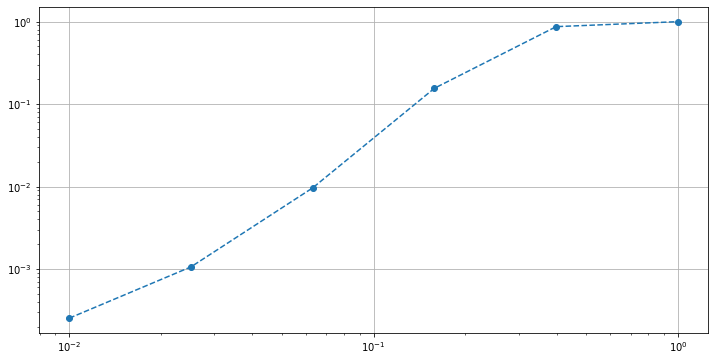

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.loglog(r_values, C_values, 'o--')
ax.grid()
plt.show()

In [21]:
r_values_ens, C_values_ens = correlation_sum(prediction_for_stats[:5000])

Compute r = 0.01
	i = 0
	i = 1
	i = 2
	i = 3
	i = 4
	i = 5
	i = 6
	i = 7
	i = 8
	i = 9
	i = 10
	i = 11
	i = 12
	i = 13
	i = 14
	i = 15
	i = 16
	i = 17
	i = 18
	i = 19
	i = 20
	i = 21
	i = 22
	i = 23
	i = 24
	i = 25
	i = 26
	i = 27
	i = 28
	i = 29
	i = 30
	i = 31
	i = 32
	i = 33
	i = 34
	i = 35
	i = 36
	i = 37
	i = 38
	i = 39
	i = 40
	i = 41
	i = 42
	i = 43
	i = 44
	i = 45
	i = 46
	i = 47
	i = 48
	i = 49
	i = 50
	i = 51
	i = 52
	i = 53
	i = 54
	i = 55
	i = 56
	i = 57
	i = 58
	i = 59
	i = 60
	i = 61
	i = 62
	i = 63
	i = 64
	i = 65
	i = 66
	i = 67
	i = 68
	i = 69
	i = 70
	i = 71
	i = 72
	i = 73
	i = 74
	i = 75
	i = 76
	i = 77
	i = 78
	i = 79
	i = 80
	i = 81
	i = 82
	i = 83
	i = 84
	i = 85
	i = 86
	i = 87
	i = 88
	i = 89
	i = 90
	i = 91
	i = 92
	i = 93
	i = 94
	i = 95
	i = 96
	i = 97
	i = 98
	i = 99
	i = 100
	i = 101
	i = 102
	i = 103
	i = 104
	i = 105
	i = 106
	i = 107
	i = 108
	i = 109
	i = 110
	i = 111
	i = 112
	i = 113
	i = 114
	i = 115
	i = 116
	i = 117
	i = 118
	i = 119
	i = 120
	i =

	i = 924
	i = 925
	i = 926
	i = 927
	i = 928
	i = 929
	i = 930
	i = 931
	i = 932
	i = 933
	i = 934
	i = 935
	i = 936
	i = 937
	i = 938
	i = 939
	i = 940
	i = 941
	i = 942
	i = 943
	i = 944
	i = 945
	i = 946
	i = 947
	i = 948
	i = 949
	i = 950
	i = 951
	i = 952
	i = 953
	i = 954
	i = 955
	i = 956
	i = 957
	i = 958
	i = 959
	i = 960
	i = 961
	i = 962
	i = 963
	i = 964
	i = 965
	i = 966
	i = 967
	i = 968
	i = 969
	i = 970
	i = 971
	i = 972
	i = 973
	i = 974
	i = 975
	i = 976
	i = 977
	i = 978
	i = 979
	i = 980
	i = 981
	i = 982
	i = 983
	i = 984
	i = 985
	i = 986
	i = 987
	i = 988
	i = 989
	i = 990
	i = 991
	i = 992
	i = 993
	i = 994
	i = 995
	i = 996
	i = 997
	i = 998
	i = 999
	i = 1000
	i = 1001
	i = 1002
	i = 1003
	i = 1004
	i = 1005
	i = 1006
	i = 1007
	i = 1008
	i = 1009
	i = 1010
	i = 1011
	i = 1012
	i = 1013
	i = 1014
	i = 1015
	i = 1016
	i = 1017
	i = 1018
	i = 1019
	i = 1020
	i = 1021
	i = 1022
	i = 1023
	i = 1024
	i = 1025
	i = 1026
	i = 1027
	i = 1028
	i = 1029
	i = 1030
	i = 1

	i = 1752
	i = 1753
	i = 1754
	i = 1755
	i = 1756
	i = 1757
	i = 1758
	i = 1759
	i = 1760
	i = 1761
	i = 1762
	i = 1763
	i = 1764
	i = 1765
	i = 1766
	i = 1767
	i = 1768
	i = 1769
	i = 1770
	i = 1771
	i = 1772
	i = 1773
	i = 1774
	i = 1775
	i = 1776
	i = 1777
	i = 1778
	i = 1779
	i = 1780
	i = 1781
	i = 1782
	i = 1783
	i = 1784
	i = 1785
	i = 1786
	i = 1787
	i = 1788
	i = 1789
	i = 1790
	i = 1791
	i = 1792
	i = 1793
	i = 1794
	i = 1795
	i = 1796
	i = 1797
	i = 1798
	i = 1799
	i = 1800
	i = 1801
	i = 1802
	i = 1803
	i = 1804
	i = 1805
	i = 1806
	i = 1807
	i = 1808
	i = 1809
	i = 1810
	i = 1811
	i = 1812
	i = 1813
	i = 1814
	i = 1815
	i = 1816
	i = 1817
	i = 1818
	i = 1819
	i = 1820
	i = 1821
	i = 1822
	i = 1823
	i = 1824
	i = 1825
	i = 1826
	i = 1827
	i = 1828
	i = 1829
	i = 1830
	i = 1831
	i = 1832
	i = 1833
	i = 1834
	i = 1835
	i = 1836
	i = 1837
	i = 1838
	i = 1839
	i = 1840
	i = 1841
	i = 1842
	i = 1843
	i = 1844
	i = 1845
	i = 1846
	i = 1847
	i = 1848
	i = 1849
	i = 1850
	i = 1851


	i = 2574
	i = 2575
	i = 2576
	i = 2577
	i = 2578
	i = 2579
	i = 2580
	i = 2581
	i = 2582
	i = 2583
	i = 2584
	i = 2585
	i = 2586
	i = 2587
	i = 2588
	i = 2589
	i = 2590
	i = 2591
	i = 2592
	i = 2593
	i = 2594
	i = 2595
	i = 2596
	i = 2597
	i = 2598
	i = 2599
	i = 2600
	i = 2601
	i = 2602
	i = 2603
	i = 2604
	i = 2605
	i = 2606
	i = 2607
	i = 2608
	i = 2609
	i = 2610
	i = 2611
	i = 2612
	i = 2613
	i = 2614
	i = 2615
	i = 2616
	i = 2617
	i = 2618
	i = 2619
	i = 2620
	i = 2621
	i = 2622
	i = 2623
	i = 2624
	i = 2625
	i = 2626
	i = 2627
	i = 2628
	i = 2629
	i = 2630
	i = 2631
	i = 2632
	i = 2633
	i = 2634
	i = 2635
	i = 2636
	i = 2637
	i = 2638
	i = 2639
	i = 2640
	i = 2641
	i = 2642
	i = 2643
	i = 2644
	i = 2645
	i = 2646
	i = 2647
	i = 2648
	i = 2649
	i = 2650
	i = 2651
	i = 2652
	i = 2653
	i = 2654
	i = 2655
	i = 2656
	i = 2657
	i = 2658
	i = 2659
	i = 2660
	i = 2661
	i = 2662
	i = 2663
	i = 2664
	i = 2665
	i = 2666
	i = 2667
	i = 2668
	i = 2669
	i = 2670
	i = 2671
	i = 2672
	i = 2673


	i = 3406
	i = 3407
	i = 3408
	i = 3409
	i = 3410
	i = 3411
	i = 3412
	i = 3413
	i = 3414
	i = 3415
	i = 3416
	i = 3417
	i = 3418
	i = 3419
	i = 3420
	i = 3421
	i = 3422
	i = 3423
	i = 3424
	i = 3425
	i = 3426
	i = 3427
	i = 3428
	i = 3429
	i = 3430
	i = 3431
	i = 3432
	i = 3433
	i = 3434
	i = 3435
	i = 3436
	i = 3437
	i = 3438
	i = 3439
	i = 3440
	i = 3441
	i = 3442
	i = 3443
	i = 3444
	i = 3445
	i = 3446
	i = 3447
	i = 3448
	i = 3449
	i = 3450
	i = 3451
	i = 3452
	i = 3453
	i = 3454
	i = 3455
	i = 3456
	i = 3457
	i = 3458
	i = 3459
	i = 3460
	i = 3461
	i = 3462
	i = 3463
	i = 3464
	i = 3465
	i = 3466
	i = 3467
	i = 3468
	i = 3469
	i = 3470
	i = 3471
	i = 3472
	i = 3473
	i = 3474
	i = 3475
	i = 3476
	i = 3477
	i = 3478
	i = 3479
	i = 3480
	i = 3481
	i = 3482
	i = 3483
	i = 3484
	i = 3485
	i = 3486
	i = 3487
	i = 3488
	i = 3489
	i = 3490
	i = 3491
	i = 3492
	i = 3493
	i = 3494
	i = 3495
	i = 3496
	i = 3497
	i = 3498
	i = 3499
	i = 3500
	i = 3501
	i = 3502
	i = 3503
	i = 3504
	i = 3505


	i = 56
	i = 57
	i = 58
	i = 59
	i = 60
	i = 61
	i = 62
	i = 63
	i = 64
	i = 65
	i = 66
	i = 67
	i = 68
	i = 69
	i = 70
	i = 71
	i = 72
	i = 73
	i = 74
	i = 75
	i = 76
	i = 77
	i = 78
	i = 79
	i = 80
	i = 81
	i = 82
	i = 83
	i = 84
	i = 85
	i = 86
	i = 87
	i = 88
	i = 89
	i = 90
	i = 91
	i = 92
	i = 93
	i = 94
	i = 95
	i = 96
	i = 97
	i = 98
	i = 99
	i = 100
	i = 101
	i = 102
	i = 103
	i = 104
	i = 105
	i = 106
	i = 107
	i = 108
	i = 109
	i = 110
	i = 111
	i = 112
	i = 113
	i = 114
	i = 115
	i = 116
	i = 117
	i = 118
	i = 119
	i = 120
	i = 121
	i = 122
	i = 123
	i = 124
	i = 125
	i = 126
	i = 127
	i = 128
	i = 129
	i = 130
	i = 131
	i = 132
	i = 133
	i = 134
	i = 135
	i = 136
	i = 137
	i = 138
	i = 139
	i = 140
	i = 141
	i = 142
	i = 143
	i = 144
	i = 145
	i = 146
	i = 147
	i = 148
	i = 149
	i = 150
	i = 151
	i = 152
	i = 153
	i = 154
	i = 155
	i = 156
	i = 157
	i = 158
	i = 159
	i = 160
	i = 161
	i = 162
	i = 163
	i = 164
	i = 165
	i = 166
	i = 167
	i = 168
	i = 169
	i = 170
	i = 171


	i = 973
	i = 974
	i = 975
	i = 976
	i = 977
	i = 978
	i = 979
	i = 980
	i = 981
	i = 982
	i = 983
	i = 984
	i = 985
	i = 986
	i = 987
	i = 988
	i = 989
	i = 990
	i = 991
	i = 992
	i = 993
	i = 994
	i = 995
	i = 996
	i = 997
	i = 998
	i = 999
	i = 1000
	i = 1001
	i = 1002
	i = 1003
	i = 1004
	i = 1005
	i = 1006
	i = 1007
	i = 1008
	i = 1009
	i = 1010
	i = 1011
	i = 1012
	i = 1013
	i = 1014
	i = 1015
	i = 1016
	i = 1017
	i = 1018
	i = 1019
	i = 1020
	i = 1021
	i = 1022
	i = 1023
	i = 1024
	i = 1025
	i = 1026
	i = 1027
	i = 1028
	i = 1029
	i = 1030
	i = 1031
	i = 1032
	i = 1033
	i = 1034
	i = 1035
	i = 1036
	i = 1037
	i = 1038
	i = 1039
	i = 1040
	i = 1041
	i = 1042
	i = 1043
	i = 1044
	i = 1045
	i = 1046
	i = 1047
	i = 1048
	i = 1049
	i = 1050
	i = 1051
	i = 1052
	i = 1053
	i = 1054
	i = 1055
	i = 1056
	i = 1057
	i = 1058
	i = 1059
	i = 1060
	i = 1061
	i = 1062
	i = 1063
	i = 1064
	i = 1065
	i = 1066
	i = 1067
	i = 1068
	i = 1069
	i = 1070
	i = 1071
	i = 1072
	i = 1073
	i = 1074
	i = 10

	i = 1803
	i = 1804
	i = 1805
	i = 1806
	i = 1807
	i = 1808
	i = 1809
	i = 1810
	i = 1811
	i = 1812
	i = 1813
	i = 1814
	i = 1815
	i = 1816
	i = 1817
	i = 1818
	i = 1819
	i = 1820
	i = 1821
	i = 1822
	i = 1823
	i = 1824
	i = 1825
	i = 1826
	i = 1827
	i = 1828
	i = 1829
	i = 1830
	i = 1831
	i = 1832
	i = 1833
	i = 1834
	i = 1835
	i = 1836
	i = 1837
	i = 1838
	i = 1839
	i = 1840
	i = 1841
	i = 1842
	i = 1843
	i = 1844
	i = 1845
	i = 1846
	i = 1847
	i = 1848
	i = 1849
	i = 1850
	i = 1851
	i = 1852
	i = 1853
	i = 1854
	i = 1855
	i = 1856
	i = 1857
	i = 1858
	i = 1859
	i = 1860
	i = 1861
	i = 1862
	i = 1863
	i = 1864
	i = 1865
	i = 1866
	i = 1867
	i = 1868
	i = 1869
	i = 1870
	i = 1871
	i = 1872
	i = 1873
	i = 1874
	i = 1875
	i = 1876
	i = 1877
	i = 1878
	i = 1879
	i = 1880
	i = 1881
	i = 1882
	i = 1883
	i = 1884
	i = 1885
	i = 1886
	i = 1887
	i = 1888
	i = 1889
	i = 1890
	i = 1891
	i = 1892
	i = 1893
	i = 1894
	i = 1895
	i = 1896
	i = 1897
	i = 1898
	i = 1899
	i = 1900
	i = 1901
	i = 1902


	i = 2630
	i = 2631
	i = 2632
	i = 2633
	i = 2634
	i = 2635
	i = 2636
	i = 2637
	i = 2638
	i = 2639
	i = 2640
	i = 2641
	i = 2642
	i = 2643
	i = 2644
	i = 2645
	i = 2646
	i = 2647
	i = 2648
	i = 2649
	i = 2650
	i = 2651
	i = 2652
	i = 2653
	i = 2654
	i = 2655
	i = 2656
	i = 2657
	i = 2658
	i = 2659
	i = 2660
	i = 2661
	i = 2662
	i = 2663
	i = 2664
	i = 2665
	i = 2666
	i = 2667
	i = 2668
	i = 2669
	i = 2670
	i = 2671
	i = 2672
	i = 2673
	i = 2674
	i = 2675
	i = 2676
	i = 2677
	i = 2678
	i = 2679
	i = 2680
	i = 2681
	i = 2682
	i = 2683
	i = 2684
	i = 2685
	i = 2686
	i = 2687
	i = 2688
	i = 2689
	i = 2690
	i = 2691
	i = 2692
	i = 2693
	i = 2694
	i = 2695
	i = 2696
	i = 2697
	i = 2698
	i = 2699
	i = 2700
	i = 2701
	i = 2702
	i = 2703
	i = 2704
	i = 2705
	i = 2706
	i = 2707
	i = 2708
	i = 2709
	i = 2710
	i = 2711
	i = 2712
	i = 2713
	i = 2714
	i = 2715
	i = 2716
	i = 2717
	i = 2718
	i = 2719
	i = 2720
	i = 2721
	i = 2722
	i = 2723
	i = 2724
	i = 2725
	i = 2726
	i = 2727
	i = 2728
	i = 2729


	i = 3458
	i = 3459
	i = 3460
	i = 3461
	i = 3462
	i = 3463
	i = 3464
	i = 3465
	i = 3466
	i = 3467
	i = 3468
	i = 3469
	i = 3470
	i = 3471
	i = 3472
	i = 3473
	i = 3474
	i = 3475
	i = 3476
	i = 3477
	i = 3478
	i = 3479
	i = 3480
	i = 3481
	i = 3482
	i = 3483
	i = 3484
	i = 3485
	i = 3486
	i = 3487
	i = 3488
	i = 3489
	i = 3490
	i = 3491
	i = 3492
	i = 3493
	i = 3494
	i = 3495
	i = 3496
	i = 3497
	i = 3498
	i = 3499
	i = 3500
	i = 3501
	i = 3502
	i = 3503
	i = 3504
	i = 3505
	i = 3506
	i = 3507
	i = 3508
	i = 3509
	i = 3510
	i = 3511
	i = 3512
	i = 3513
	i = 3514
	i = 3515
	i = 3516
	i = 3517
	i = 3518
	i = 3519
	i = 3520
	i = 3521
	i = 3522
	i = 3523
	i = 3524
	i = 3525
	i = 3526
	i = 3527
	i = 3528
	i = 3529
	i = 3530
	i = 3531
	i = 3532
	i = 3533
	i = 3534
	i = 3535
	i = 3536
	i = 3537
	i = 3538
	i = 3539
	i = 3540
	i = 3541
	i = 3542
	i = 3543
	i = 3544
	i = 3545
	i = 3546
	i = 3547
	i = 3548
	i = 3549
	i = 3550
	i = 3551
	i = 3552
	i = 3553
	i = 3554
	i = 3555
	i = 3556
	i = 3557


	i = 4294
	i = 4295
	i = 4296
	i = 4297
	i = 4298
	i = 4299
	i = 4300
	i = 4301
	i = 4302
	i = 4303
	i = 4304
	i = 4305
	i = 4306
	i = 4307
	i = 4308
	i = 4309
	i = 4310
	i = 4311
	i = 4312
	i = 4313
	i = 4314
	i = 4315
	i = 4316
	i = 4317
	i = 4318
	i = 4319
	i = 4320
	i = 4321
	i = 4322
	i = 4323
	i = 4324
	i = 4325
	i = 4326
	i = 4327
	i = 4328
	i = 4329
	i = 4330
	i = 4331
	i = 4332
	i = 4333
	i = 4334
	i = 4335
	i = 4336
	i = 4337
	i = 4338
	i = 4339
	i = 4340
	i = 4341
	i = 4342
	i = 4343
	i = 4344
	i = 4345
	i = 4346
	i = 4347
	i = 4348
	i = 4349
	i = 4350
	i = 4351
	i = 4352
	i = 4353
	i = 4354
	i = 4355
	i = 4356
	i = 4357
	i = 4358
	i = 4359
	i = 4360
	i = 4361
	i = 4362
	i = 4363
	i = 4364
	i = 4365
	i = 4366
	i = 4367
	i = 4368
	i = 4369
	i = 4370
	i = 4371
	i = 4372
	i = 4373
	i = 4374
	i = 4375
	i = 4376
	i = 4377
	i = 4378
	i = 4379
	i = 4380
	i = 4381
	i = 4382
	i = 4383
	i = 4384
	i = 4385
	i = 4386
	i = 4387
	i = 4388
	i = 4389
	i = 4390
	i = 4391
	i = 4392
	i = 4393


	i = 139
	i = 140
	i = 141
	i = 142
	i = 143
	i = 144
	i = 145
	i = 146
	i = 147
	i = 148
	i = 149
	i = 150
	i = 151
	i = 152
	i = 153
	i = 154
	i = 155
	i = 156
	i = 157
	i = 158
	i = 159
	i = 160
	i = 161
	i = 162
	i = 163
	i = 164
	i = 165
	i = 166
	i = 167
	i = 168
	i = 169
	i = 170
	i = 171
	i = 172
	i = 173
	i = 174
	i = 175
	i = 176
	i = 177
	i = 178
	i = 179
	i = 180
	i = 181
	i = 182
	i = 183
	i = 184
	i = 185
	i = 186
	i = 187
	i = 188
	i = 189
	i = 190
	i = 191
	i = 192
	i = 193
	i = 194
	i = 195
	i = 196
	i = 197
	i = 198
	i = 199
	i = 200
	i = 201
	i = 202
	i = 203
	i = 204
	i = 205
	i = 206
	i = 207
	i = 208
	i = 209
	i = 210
	i = 211
	i = 212
	i = 213
	i = 214
	i = 215
	i = 216
	i = 217
	i = 218
	i = 219
	i = 220
	i = 221
	i = 222
	i = 223
	i = 224
	i = 225
	i = 226
	i = 227
	i = 228
	i = 229
	i = 230
	i = 231
	i = 232
	i = 233
	i = 234
	i = 235
	i = 236
	i = 237
	i = 238
	i = 239
	i = 240
	i = 241
	i = 242
	i = 243
	i = 244
	i = 245
	i = 246
	i = 247
	i = 248
	i = 249
	

	i = 1050
	i = 1051
	i = 1052
	i = 1053
	i = 1054
	i = 1055
	i = 1056
	i = 1057
	i = 1058
	i = 1059
	i = 1060
	i = 1061
	i = 1062
	i = 1063
	i = 1064
	i = 1065
	i = 1066
	i = 1067
	i = 1068
	i = 1069
	i = 1070
	i = 1071
	i = 1072
	i = 1073
	i = 1074
	i = 1075
	i = 1076
	i = 1077
	i = 1078
	i = 1079
	i = 1080
	i = 1081
	i = 1082
	i = 1083
	i = 1084
	i = 1085
	i = 1086
	i = 1087
	i = 1088
	i = 1089
	i = 1090
	i = 1091
	i = 1092
	i = 1093
	i = 1094
	i = 1095
	i = 1096
	i = 1097
	i = 1098
	i = 1099
	i = 1100
	i = 1101
	i = 1102
	i = 1103
	i = 1104
	i = 1105
	i = 1106
	i = 1107
	i = 1108
	i = 1109
	i = 1110
	i = 1111
	i = 1112
	i = 1113
	i = 1114
	i = 1115
	i = 1116
	i = 1117
	i = 1118
	i = 1119
	i = 1120
	i = 1121
	i = 1122
	i = 1123
	i = 1124
	i = 1125
	i = 1126
	i = 1127
	i = 1128
	i = 1129
	i = 1130
	i = 1131
	i = 1132
	i = 1133
	i = 1134
	i = 1135
	i = 1136
	i = 1137
	i = 1138
	i = 1139
	i = 1140
	i = 1141
	i = 1142
	i = 1143
	i = 1144
	i = 1145
	i = 1146
	i = 1147
	i = 1148
	i = 1149


	i = 1872
	i = 1873
	i = 1874
	i = 1875
	i = 1876
	i = 1877
	i = 1878
	i = 1879
	i = 1880
	i = 1881
	i = 1882
	i = 1883
	i = 1884
	i = 1885
	i = 1886
	i = 1887
	i = 1888
	i = 1889
	i = 1890
	i = 1891
	i = 1892
	i = 1893
	i = 1894
	i = 1895
	i = 1896
	i = 1897
	i = 1898
	i = 1899
	i = 1900
	i = 1901
	i = 1902
	i = 1903
	i = 1904
	i = 1905
	i = 1906
	i = 1907
	i = 1908
	i = 1909
	i = 1910
	i = 1911
	i = 1912
	i = 1913
	i = 1914
	i = 1915
	i = 1916
	i = 1917
	i = 1918
	i = 1919
	i = 1920
	i = 1921
	i = 1922
	i = 1923
	i = 1924
	i = 1925
	i = 1926
	i = 1927
	i = 1928
	i = 1929
	i = 1930
	i = 1931
	i = 1932
	i = 1933
	i = 1934
	i = 1935
	i = 1936
	i = 1937
	i = 1938
	i = 1939
	i = 1940
	i = 1941
	i = 1942
	i = 1943
	i = 1944
	i = 1945
	i = 1946
	i = 1947
	i = 1948
	i = 1949
	i = 1950
	i = 1951
	i = 1952
	i = 1953
	i = 1954
	i = 1955
	i = 1956
	i = 1957
	i = 1958
	i = 1959
	i = 1960
	i = 1961
	i = 1962
	i = 1963
	i = 1964
	i = 1965
	i = 1966
	i = 1967
	i = 1968
	i = 1969
	i = 1970
	i = 1971


	i = 2701
	i = 2702
	i = 2703
	i = 2704
	i = 2705
	i = 2706
	i = 2707
	i = 2708
	i = 2709
	i = 2710
	i = 2711
	i = 2712
	i = 2713
	i = 2714
	i = 2715
	i = 2716
	i = 2717
	i = 2718
	i = 2719
	i = 2720
	i = 2721
	i = 2722
	i = 2723
	i = 2724
	i = 2725
	i = 2726
	i = 2727
	i = 2728
	i = 2729
	i = 2730
	i = 2731
	i = 2732
	i = 2733
	i = 2734
	i = 2735
	i = 2736
	i = 2737
	i = 2738
	i = 2739
	i = 2740
	i = 2741
	i = 2742
	i = 2743
	i = 2744
	i = 2745
	i = 2746
	i = 2747
	i = 2748
	i = 2749
	i = 2750
	i = 2751
	i = 2752
	i = 2753
	i = 2754
	i = 2755
	i = 2756
	i = 2757
	i = 2758
	i = 2759
	i = 2760
	i = 2761
	i = 2762
	i = 2763
	i = 2764
	i = 2765
	i = 2766
	i = 2767
	i = 2768
	i = 2769
	i = 2770
	i = 2771
	i = 2772
	i = 2773
	i = 2774
	i = 2775
	i = 2776
	i = 2777
	i = 2778
	i = 2779
	i = 2780
	i = 2781
	i = 2782
	i = 2783
	i = 2784
	i = 2785
	i = 2786
	i = 2787
	i = 2788
	i = 2789
	i = 2790
	i = 2791
	i = 2792
	i = 2793
	i = 2794
	i = 2795
	i = 2796
	i = 2797
	i = 2798
	i = 2799
	i = 2800


	i = 3525
	i = 3526
	i = 3527
	i = 3528
	i = 3529
	i = 3530
	i = 3531
	i = 3532
	i = 3533
	i = 3534
	i = 3535
	i = 3536
	i = 3537
	i = 3538
	i = 3539
	i = 3540
	i = 3541
	i = 3542
	i = 3543
	i = 3544
	i = 3545
	i = 3546
	i = 3547
	i = 3548
	i = 3549
	i = 3550
	i = 3551
	i = 3552
	i = 3553
	i = 3554
	i = 3555
	i = 3556
	i = 3557
	i = 3558
	i = 3559
	i = 3560
	i = 3561
	i = 3562
	i = 3563
	i = 3564
	i = 3565
	i = 3566
	i = 3567
	i = 3568
	i = 3569
	i = 3570
	i = 3571
	i = 3572
	i = 3573
	i = 3574
	i = 3575
	i = 3576
	i = 3577
	i = 3578
	i = 3579
	i = 3580
	i = 3581
	i = 3582
	i = 3583
	i = 3584
	i = 3585
	i = 3586
	i = 3587
	i = 3588
	i = 3589
	i = 3590
	i = 3591
	i = 3592
	i = 3593
	i = 3594
	i = 3595
	i = 3596
	i = 3597
	i = 3598
	i = 3599
	i = 3600
	i = 3601
	i = 3602
	i = 3603
	i = 3604
	i = 3605
	i = 3606
	i = 3607
	i = 3608
	i = 3609
	i = 3610
	i = 3611
	i = 3612
	i = 3613
	i = 3614
	i = 3615
	i = 3616
	i = 3617
	i = 3618
	i = 3619
	i = 3620
	i = 3621
	i = 3622
	i = 3623
	i = 3624


	i = 4357
	i = 4358
	i = 4359
	i = 4360
	i = 4361
	i = 4362
	i = 4363
	i = 4364
	i = 4365
	i = 4366
	i = 4367
	i = 4368
	i = 4369
	i = 4370
	i = 4371
	i = 4372
	i = 4373
	i = 4374
	i = 4375
	i = 4376
	i = 4377
	i = 4378
	i = 4379
	i = 4380
	i = 4381
	i = 4382
	i = 4383
	i = 4384
	i = 4385
	i = 4386
	i = 4387
	i = 4388
	i = 4389
	i = 4390
	i = 4391
	i = 4392
	i = 4393
	i = 4394
	i = 4395
	i = 4396
	i = 4397
	i = 4398
	i = 4399
	i = 4400
	i = 4401
	i = 4402
	i = 4403
	i = 4404
	i = 4405
	i = 4406
	i = 4407
	i = 4408
	i = 4409
	i = 4410
	i = 4411
	i = 4412
	i = 4413
	i = 4414
	i = 4415
	i = 4416
	i = 4417
	i = 4418
	i = 4419
	i = 4420
	i = 4421
	i = 4422
	i = 4423
	i = 4424
	i = 4425
	i = 4426
	i = 4427
	i = 4428
	i = 4429
	i = 4430
	i = 4431
	i = 4432
	i = 4433
	i = 4434
	i = 4435
	i = 4436
	i = 4437
	i = 4438
	i = 4439
	i = 4440
	i = 4441
	i = 4442
	i = 4443
	i = 4444
	i = 4445
	i = 4446
	i = 4447
	i = 4448
	i = 4449
	i = 4450
	i = 4451
	i = 4452
	i = 4453
	i = 4454
	i = 4455
	i = 4456


	i = 213
	i = 214
	i = 215
	i = 216
	i = 217
	i = 218
	i = 219
	i = 220
	i = 221
	i = 222
	i = 223
	i = 224
	i = 225
	i = 226
	i = 227
	i = 228
	i = 229
	i = 230
	i = 231
	i = 232
	i = 233
	i = 234
	i = 235
	i = 236
	i = 237
	i = 238
	i = 239
	i = 240
	i = 241
	i = 242
	i = 243
	i = 244
	i = 245
	i = 246
	i = 247
	i = 248
	i = 249
	i = 250
	i = 251
	i = 252
	i = 253
	i = 254
	i = 255
	i = 256
	i = 257
	i = 258
	i = 259
	i = 260
	i = 261
	i = 262
	i = 263
	i = 264
	i = 265
	i = 266
	i = 267
	i = 268
	i = 269
	i = 270
	i = 271
	i = 272
	i = 273
	i = 274
	i = 275
	i = 276
	i = 277
	i = 278
	i = 279
	i = 280
	i = 281
	i = 282
	i = 283
	i = 284
	i = 285
	i = 286
	i = 287
	i = 288
	i = 289
	i = 290
	i = 291
	i = 292
	i = 293
	i = 294
	i = 295
	i = 296
	i = 297
	i = 298
	i = 299
	i = 300
	i = 301
	i = 302
	i = 303
	i = 304
	i = 305
	i = 306
	i = 307
	i = 308
	i = 309
	i = 310
	i = 311
	i = 312
	i = 313
	i = 314
	i = 315
	i = 316
	i = 317
	i = 318
	i = 319
	i = 320
	i = 321
	i = 322
	i = 323
	

	i = 1116
	i = 1117
	i = 1118
	i = 1119
	i = 1120
	i = 1121
	i = 1122
	i = 1123
	i = 1124
	i = 1125
	i = 1126
	i = 1127
	i = 1128
	i = 1129
	i = 1130
	i = 1131
	i = 1132
	i = 1133
	i = 1134
	i = 1135
	i = 1136
	i = 1137
	i = 1138
	i = 1139
	i = 1140
	i = 1141
	i = 1142
	i = 1143
	i = 1144
	i = 1145
	i = 1146
	i = 1147
	i = 1148
	i = 1149
	i = 1150
	i = 1151
	i = 1152
	i = 1153
	i = 1154
	i = 1155
	i = 1156
	i = 1157
	i = 1158
	i = 1159
	i = 1160
	i = 1161
	i = 1162
	i = 1163
	i = 1164
	i = 1165
	i = 1166
	i = 1167
	i = 1168
	i = 1169
	i = 1170
	i = 1171
	i = 1172
	i = 1173
	i = 1174
	i = 1175
	i = 1176
	i = 1177
	i = 1178
	i = 1179
	i = 1180
	i = 1181
	i = 1182
	i = 1183
	i = 1184
	i = 1185
	i = 1186
	i = 1187
	i = 1188
	i = 1189
	i = 1190
	i = 1191
	i = 1192
	i = 1193
	i = 1194
	i = 1195
	i = 1196
	i = 1197
	i = 1198
	i = 1199
	i = 1200
	i = 1201
	i = 1202
	i = 1203
	i = 1204
	i = 1205
	i = 1206
	i = 1207
	i = 1208
	i = 1209
	i = 1210
	i = 1211
	i = 1212
	i = 1213
	i = 1214
	i = 1215


	i = 1939
	i = 1940
	i = 1941
	i = 1942
	i = 1943
	i = 1944
	i = 1945
	i = 1946
	i = 1947
	i = 1948
	i = 1949
	i = 1950
	i = 1951
	i = 1952
	i = 1953
	i = 1954
	i = 1955
	i = 1956
	i = 1957
	i = 1958
	i = 1959
	i = 1960
	i = 1961
	i = 1962
	i = 1963
	i = 1964
	i = 1965
	i = 1966
	i = 1967
	i = 1968
	i = 1969
	i = 1970
	i = 1971
	i = 1972
	i = 1973
	i = 1974
	i = 1975
	i = 1976
	i = 1977
	i = 1978
	i = 1979
	i = 1980
	i = 1981
	i = 1982
	i = 1983
	i = 1984
	i = 1985
	i = 1986
	i = 1987
	i = 1988
	i = 1989
	i = 1990
	i = 1991
	i = 1992
	i = 1993
	i = 1994
	i = 1995
	i = 1996
	i = 1997
	i = 1998
	i = 1999
	i = 2000
	i = 2001
	i = 2002
	i = 2003
	i = 2004
	i = 2005
	i = 2006
	i = 2007
	i = 2008
	i = 2009
	i = 2010
	i = 2011
	i = 2012
	i = 2013
	i = 2014
	i = 2015
	i = 2016
	i = 2017
	i = 2018
	i = 2019
	i = 2020
	i = 2021
	i = 2022
	i = 2023
	i = 2024
	i = 2025
	i = 2026
	i = 2027
	i = 2028
	i = 2029
	i = 2030
	i = 2031
	i = 2032
	i = 2033
	i = 2034
	i = 2035
	i = 2036
	i = 2037
	i = 2038


	i = 2762
	i = 2763
	i = 2764
	i = 2765
	i = 2766
	i = 2767
	i = 2768
	i = 2769
	i = 2770
	i = 2771
	i = 2772
	i = 2773
	i = 2774
	i = 2775
	i = 2776
	i = 2777
	i = 2778
	i = 2779
	i = 2780
	i = 2781
	i = 2782
	i = 2783
	i = 2784
	i = 2785
	i = 2786
	i = 2787
	i = 2788
	i = 2789
	i = 2790
	i = 2791
	i = 2792
	i = 2793
	i = 2794
	i = 2795
	i = 2796
	i = 2797
	i = 2798
	i = 2799
	i = 2800
	i = 2801
	i = 2802
	i = 2803
	i = 2804
	i = 2805
	i = 2806
	i = 2807
	i = 2808
	i = 2809
	i = 2810
	i = 2811
	i = 2812
	i = 2813
	i = 2814
	i = 2815
	i = 2816
	i = 2817
	i = 2818
	i = 2819
	i = 2820
	i = 2821
	i = 2822
	i = 2823
	i = 2824
	i = 2825
	i = 2826
	i = 2827
	i = 2828
	i = 2829
	i = 2830
	i = 2831
	i = 2832
	i = 2833
	i = 2834
	i = 2835
	i = 2836
	i = 2837
	i = 2838
	i = 2839
	i = 2840
	i = 2841
	i = 2842
	i = 2843
	i = 2844
	i = 2845
	i = 2846
	i = 2847
	i = 2848
	i = 2849
	i = 2850
	i = 2851
	i = 2852
	i = 2853
	i = 2854
	i = 2855
	i = 2856
	i = 2857
	i = 2858
	i = 2859
	i = 2860
	i = 2861


	i = 3592
	i = 3593
	i = 3594
	i = 3595
	i = 3596
	i = 3597
	i = 3598
	i = 3599
	i = 3600
	i = 3601
	i = 3602
	i = 3603
	i = 3604
	i = 3605
	i = 3606
	i = 3607
	i = 3608
	i = 3609
	i = 3610
	i = 3611
	i = 3612
	i = 3613
	i = 3614
	i = 3615
	i = 3616
	i = 3617
	i = 3618
	i = 3619
	i = 3620
	i = 3621
	i = 3622
	i = 3623
	i = 3624
	i = 3625
	i = 3626
	i = 3627
	i = 3628
	i = 3629
	i = 3630
	i = 3631
	i = 3632
	i = 3633
	i = 3634
	i = 3635
	i = 3636
	i = 3637
	i = 3638
	i = 3639
	i = 3640
	i = 3641
	i = 3642
	i = 3643
	i = 3644
	i = 3645
	i = 3646
	i = 3647
	i = 3648
	i = 3649
	i = 3650
	i = 3651
	i = 3652
	i = 3653
	i = 3654
	i = 3655
	i = 3656
	i = 3657
	i = 3658
	i = 3659
	i = 3660
	i = 3661
	i = 3662
	i = 3663
	i = 3664
	i = 3665
	i = 3666
	i = 3667
	i = 3668
	i = 3669
	i = 3670
	i = 3671
	i = 3672
	i = 3673
	i = 3674
	i = 3675
	i = 3676
	i = 3677
	i = 3678
	i = 3679
	i = 3680
	i = 3681
	i = 3682
	i = 3683
	i = 3684
	i = 3685
	i = 3686
	i = 3687
	i = 3688
	i = 3689
	i = 3690
	i = 3691


	i = 4428
	i = 4429
	i = 4430
	i = 4431
	i = 4432
	i = 4433
	i = 4434
	i = 4435
	i = 4436
	i = 4437
	i = 4438
	i = 4439
	i = 4440
	i = 4441
	i = 4442
	i = 4443
	i = 4444
	i = 4445
	i = 4446
	i = 4447
	i = 4448
	i = 4449
	i = 4450
	i = 4451
	i = 4452
	i = 4453
	i = 4454
	i = 4455
	i = 4456
	i = 4457
	i = 4458
	i = 4459
	i = 4460
	i = 4461
	i = 4462
	i = 4463
	i = 4464
	i = 4465
	i = 4466
	i = 4467
	i = 4468
	i = 4469
	i = 4470
	i = 4471
	i = 4472
	i = 4473
	i = 4474
	i = 4475
	i = 4476
	i = 4477
	i = 4478
	i = 4479
	i = 4480
	i = 4481
	i = 4482
	i = 4483
	i = 4484
	i = 4485
	i = 4486
	i = 4487
	i = 4488
	i = 4489
	i = 4490
	i = 4491
	i = 4492
	i = 4493
	i = 4494
	i = 4495
	i = 4496
	i = 4497
	i = 4498
	i = 4499
	i = 4500
	i = 4501
	i = 4502
	i = 4503
	i = 4504
	i = 4505
	i = 4506
	i = 4507
	i = 4508
	i = 4509
	i = 4510
	i = 4511
	i = 4512
	i = 4513
	i = 4514
	i = 4515
	i = 4516
	i = 4517
	i = 4518
	i = 4519
	i = 4520
	i = 4521
	i = 4522
	i = 4523
	i = 4524
	i = 4525
	i = 4526
	i = 4527


	i = 290
	i = 291
	i = 292
	i = 293
	i = 294
	i = 295
	i = 296
	i = 297
	i = 298
	i = 299
	i = 300
	i = 301
	i = 302
	i = 303
	i = 304
	i = 305
	i = 306
	i = 307
	i = 308
	i = 309
	i = 310
	i = 311
	i = 312
	i = 313
	i = 314
	i = 315
	i = 316
	i = 317
	i = 318
	i = 319
	i = 320
	i = 321
	i = 322
	i = 323
	i = 324
	i = 325
	i = 326
	i = 327
	i = 328
	i = 329
	i = 330
	i = 331
	i = 332
	i = 333
	i = 334
	i = 335
	i = 336
	i = 337
	i = 338
	i = 339
	i = 340
	i = 341
	i = 342
	i = 343
	i = 344
	i = 345
	i = 346
	i = 347
	i = 348
	i = 349
	i = 350
	i = 351
	i = 352
	i = 353
	i = 354
	i = 355
	i = 356
	i = 357
	i = 358
	i = 359
	i = 360
	i = 361
	i = 362
	i = 363
	i = 364
	i = 365
	i = 366
	i = 367
	i = 368
	i = 369
	i = 370
	i = 371
	i = 372
	i = 373
	i = 374
	i = 375
	i = 376
	i = 377
	i = 378
	i = 379
	i = 380
	i = 381
	i = 382
	i = 383
	i = 384
	i = 385
	i = 386
	i = 387
	i = 388
	i = 389
	i = 390
	i = 391
	i = 392
	i = 393
	i = 394
	i = 395
	i = 396
	i = 397
	i = 398
	i = 399
	i = 400
	

	i = 1186
	i = 1187
	i = 1188
	i = 1189
	i = 1190
	i = 1191
	i = 1192
	i = 1193
	i = 1194
	i = 1195
	i = 1196
	i = 1197
	i = 1198
	i = 1199
	i = 1200
	i = 1201
	i = 1202
	i = 1203
	i = 1204
	i = 1205
	i = 1206
	i = 1207
	i = 1208
	i = 1209
	i = 1210
	i = 1211
	i = 1212
	i = 1213
	i = 1214
	i = 1215
	i = 1216
	i = 1217
	i = 1218
	i = 1219
	i = 1220
	i = 1221
	i = 1222
	i = 1223
	i = 1224
	i = 1225
	i = 1226
	i = 1227
	i = 1228
	i = 1229
	i = 1230
	i = 1231
	i = 1232
	i = 1233
	i = 1234
	i = 1235
	i = 1236
	i = 1237
	i = 1238
	i = 1239
	i = 1240
	i = 1241
	i = 1242
	i = 1243
	i = 1244
	i = 1245
	i = 1246
	i = 1247
	i = 1248
	i = 1249
	i = 1250
	i = 1251
	i = 1252
	i = 1253
	i = 1254
	i = 1255
	i = 1256
	i = 1257
	i = 1258
	i = 1259
	i = 1260
	i = 1261
	i = 1262
	i = 1263
	i = 1264
	i = 1265
	i = 1266
	i = 1267
	i = 1268
	i = 1269
	i = 1270
	i = 1271
	i = 1272
	i = 1273
	i = 1274
	i = 1275
	i = 1276
	i = 1277
	i = 1278
	i = 1279
	i = 1280
	i = 1281
	i = 1282
	i = 1283
	i = 1284
	i = 1285


	i = 2014
	i = 2015
	i = 2016
	i = 2017
	i = 2018
	i = 2019
	i = 2020
	i = 2021
	i = 2022
	i = 2023
	i = 2024
	i = 2025
	i = 2026
	i = 2027
	i = 2028
	i = 2029
	i = 2030
	i = 2031
	i = 2032
	i = 2033
	i = 2034
	i = 2035
	i = 2036
	i = 2037
	i = 2038
	i = 2039
	i = 2040
	i = 2041
	i = 2042
	i = 2043
	i = 2044
	i = 2045
	i = 2046
	i = 2047
	i = 2048
	i = 2049
	i = 2050
	i = 2051
	i = 2052
	i = 2053
	i = 2054
	i = 2055
	i = 2056
	i = 2057
	i = 2058
	i = 2059
	i = 2060
	i = 2061
	i = 2062
	i = 2063
	i = 2064
	i = 2065
	i = 2066
	i = 2067
	i = 2068
	i = 2069
	i = 2070
	i = 2071
	i = 2072
	i = 2073
	i = 2074
	i = 2075
	i = 2076
	i = 2077
	i = 2078
	i = 2079
	i = 2080
	i = 2081
	i = 2082
	i = 2083
	i = 2084
	i = 2085
	i = 2086
	i = 2087
	i = 2088
	i = 2089
	i = 2090
	i = 2091
	i = 2092
	i = 2093
	i = 2094
	i = 2095
	i = 2096
	i = 2097
	i = 2098
	i = 2099
	i = 2100
	i = 2101
	i = 2102
	i = 2103
	i = 2104
	i = 2105
	i = 2106
	i = 2107
	i = 2108
	i = 2109
	i = 2110
	i = 2111
	i = 2112
	i = 2113


	i = 2847
	i = 2848
	i = 2849
	i = 2850
	i = 2851
	i = 2852
	i = 2853
	i = 2854
	i = 2855
	i = 2856
	i = 2857
	i = 2858
	i = 2859
	i = 2860
	i = 2861
	i = 2862
	i = 2863
	i = 2864
	i = 2865
	i = 2866
	i = 2867
	i = 2868
	i = 2869
	i = 2870
	i = 2871
	i = 2872
	i = 2873
	i = 2874
	i = 2875
	i = 2876
	i = 2877
	i = 2878
	i = 2879
	i = 2880
	i = 2881
	i = 2882
	i = 2883
	i = 2884
	i = 2885
	i = 2886
	i = 2887
	i = 2888
	i = 2889
	i = 2890
	i = 2891
	i = 2892
	i = 2893
	i = 2894
	i = 2895
	i = 2896
	i = 2897
	i = 2898
	i = 2899
	i = 2900
	i = 2901
	i = 2902
	i = 2903
	i = 2904
	i = 2905
	i = 2906
	i = 2907
	i = 2908
	i = 2909
	i = 2910
	i = 2911
	i = 2912
	i = 2913
	i = 2914
	i = 2915
	i = 2916
	i = 2917
	i = 2918
	i = 2919
	i = 2920
	i = 2921
	i = 2922
	i = 2923
	i = 2924
	i = 2925
	i = 2926
	i = 2927
	i = 2928
	i = 2929
	i = 2930
	i = 2931
	i = 2932
	i = 2933
	i = 2934
	i = 2935
	i = 2936
	i = 2937
	i = 2938
	i = 2939
	i = 2940
	i = 2941
	i = 2942
	i = 2943
	i = 2944
	i = 2945
	i = 2946


	i = 3685
	i = 3686
	i = 3687
	i = 3688
	i = 3689
	i = 3690
	i = 3691
	i = 3692
	i = 3693
	i = 3694
	i = 3695
	i = 3696
	i = 3697
	i = 3698
	i = 3699
	i = 3700
	i = 3701
	i = 3702
	i = 3703
	i = 3704
	i = 3705
	i = 3706
	i = 3707
	i = 3708
	i = 3709
	i = 3710
	i = 3711
	i = 3712
	i = 3713
	i = 3714
	i = 3715
	i = 3716
	i = 3717
	i = 3718
	i = 3719
	i = 3720
	i = 3721
	i = 3722
	i = 3723
	i = 3724
	i = 3725
	i = 3726
	i = 3727
	i = 3728
	i = 3729
	i = 3730
	i = 3731
	i = 3732
	i = 3733
	i = 3734
	i = 3735
	i = 3736
	i = 3737
	i = 3738
	i = 3739
	i = 3740
	i = 3741
	i = 3742
	i = 3743
	i = 3744
	i = 3745
	i = 3746
	i = 3747
	i = 3748
	i = 3749
	i = 3750
	i = 3751
	i = 3752
	i = 3753
	i = 3754
	i = 3755
	i = 3756
	i = 3757
	i = 3758
	i = 3759
	i = 3760
	i = 3761
	i = 3762
	i = 3763
	i = 3764
	i = 3765
	i = 3766
	i = 3767
	i = 3768
	i = 3769
	i = 3770
	i = 3771
	i = 3772
	i = 3773
	i = 3774
	i = 3775
	i = 3776
	i = 3777
	i = 3778
	i = 3779
	i = 3780
	i = 3781
	i = 3782
	i = 3783
	i = 3784


	i = 4532
	i = 4533
	i = 4534
	i = 4535
	i = 4536
	i = 4537
	i = 4538
	i = 4539
	i = 4540
	i = 4541
	i = 4542
	i = 4543
	i = 4544
	i = 4545
	i = 4546
	i = 4547
	i = 4548
	i = 4549
	i = 4550
	i = 4551
	i = 4552
	i = 4553
	i = 4554
	i = 4555
	i = 4556
	i = 4557
	i = 4558
	i = 4559
	i = 4560
	i = 4561
	i = 4562
	i = 4563
	i = 4564
	i = 4565
	i = 4566
	i = 4567
	i = 4568
	i = 4569
	i = 4570
	i = 4571
	i = 4572
	i = 4573
	i = 4574
	i = 4575
	i = 4576
	i = 4577
	i = 4578
	i = 4579
	i = 4580
	i = 4581
	i = 4582
	i = 4583
	i = 4584
	i = 4585
	i = 4586
	i = 4587
	i = 4588
	i = 4589
	i = 4590
	i = 4591
	i = 4592
	i = 4593
	i = 4594
	i = 4595
	i = 4596
	i = 4597
	i = 4598
	i = 4599
	i = 4600
	i = 4601
	i = 4602
	i = 4603
	i = 4604
	i = 4605
	i = 4606
	i = 4607
	i = 4608
	i = 4609
	i = 4610
	i = 4611
	i = 4612
	i = 4613
	i = 4614
	i = 4615
	i = 4616
	i = 4617
	i = 4618
	i = 4619
	i = 4620
	i = 4621
	i = 4622
	i = 4623
	i = 4624
	i = 4625
	i = 4626
	i = 4627
	i = 4628
	i = 4629
	i = 4630
	i = 4631


	i = 401
	i = 402
	i = 403
	i = 404
	i = 405
	i = 406
	i = 407
	i = 408
	i = 409
	i = 410
	i = 411
	i = 412
	i = 413
	i = 414
	i = 415
	i = 416
	i = 417
	i = 418
	i = 419
	i = 420
	i = 421
	i = 422
	i = 423
	i = 424
	i = 425
	i = 426
	i = 427
	i = 428
	i = 429
	i = 430
	i = 431
	i = 432
	i = 433
	i = 434
	i = 435
	i = 436
	i = 437
	i = 438
	i = 439
	i = 440
	i = 441
	i = 442
	i = 443
	i = 444
	i = 445
	i = 446
	i = 447
	i = 448
	i = 449
	i = 450
	i = 451
	i = 452
	i = 453
	i = 454
	i = 455
	i = 456
	i = 457
	i = 458
	i = 459
	i = 460
	i = 461
	i = 462
	i = 463
	i = 464
	i = 465
	i = 466
	i = 467
	i = 468
	i = 469
	i = 470
	i = 471
	i = 472
	i = 473
	i = 474
	i = 475
	i = 476
	i = 477
	i = 478
	i = 479
	i = 480
	i = 481
	i = 482
	i = 483
	i = 484
	i = 485
	i = 486
	i = 487
	i = 488
	i = 489
	i = 490
	i = 491
	i = 492
	i = 493
	i = 494
	i = 495
	i = 496
	i = 497
	i = 498
	i = 499
	i = 500
	i = 501
	i = 502
	i = 503
	i = 504
	i = 505
	i = 506
	i = 507
	i = 508
	i = 509
	i = 510
	i = 511
	

	i = 1285
	i = 1286
	i = 1287
	i = 1288
	i = 1289
	i = 1290
	i = 1291
	i = 1292
	i = 1293
	i = 1294
	i = 1295
	i = 1296
	i = 1297
	i = 1298
	i = 1299
	i = 1300
	i = 1301
	i = 1302
	i = 1303
	i = 1304
	i = 1305
	i = 1306
	i = 1307
	i = 1308
	i = 1309
	i = 1310
	i = 1311
	i = 1312
	i = 1313
	i = 1314
	i = 1315
	i = 1316
	i = 1317
	i = 1318
	i = 1319
	i = 1320
	i = 1321
	i = 1322
	i = 1323
	i = 1324
	i = 1325
	i = 1326
	i = 1327
	i = 1328
	i = 1329
	i = 1330
	i = 1331
	i = 1332
	i = 1333
	i = 1334
	i = 1335
	i = 1336
	i = 1337
	i = 1338
	i = 1339
	i = 1340
	i = 1341
	i = 1342
	i = 1343
	i = 1344
	i = 1345
	i = 1346
	i = 1347
	i = 1348
	i = 1349
	i = 1350
	i = 1351
	i = 1352
	i = 1353
	i = 1354
	i = 1355
	i = 1356
	i = 1357
	i = 1358
	i = 1359
	i = 1360
	i = 1361
	i = 1362
	i = 1363
	i = 1364
	i = 1365
	i = 1366
	i = 1367
	i = 1368
	i = 1369
	i = 1370
	i = 1371
	i = 1372
	i = 1373
	i = 1374
	i = 1375
	i = 1376
	i = 1377
	i = 1378
	i = 1379
	i = 1380
	i = 1381
	i = 1382
	i = 1383
	i = 1384


	i = 2106
	i = 2107
	i = 2108
	i = 2109
	i = 2110
	i = 2111
	i = 2112
	i = 2113
	i = 2114
	i = 2115
	i = 2116
	i = 2117
	i = 2118
	i = 2119
	i = 2120
	i = 2121
	i = 2122
	i = 2123
	i = 2124
	i = 2125
	i = 2126
	i = 2127
	i = 2128
	i = 2129
	i = 2130
	i = 2131
	i = 2132
	i = 2133
	i = 2134
	i = 2135
	i = 2136
	i = 2137
	i = 2138
	i = 2139
	i = 2140
	i = 2141
	i = 2142
	i = 2143
	i = 2144
	i = 2145
	i = 2146
	i = 2147
	i = 2148
	i = 2149
	i = 2150
	i = 2151
	i = 2152
	i = 2153
	i = 2154
	i = 2155
	i = 2156
	i = 2157
	i = 2158
	i = 2159
	i = 2160
	i = 2161
	i = 2162
	i = 2163
	i = 2164
	i = 2165
	i = 2166
	i = 2167
	i = 2168
	i = 2169
	i = 2170
	i = 2171
	i = 2172
	i = 2173
	i = 2174
	i = 2175
	i = 2176
	i = 2177
	i = 2178
	i = 2179
	i = 2180
	i = 2181
	i = 2182
	i = 2183
	i = 2184
	i = 2185
	i = 2186
	i = 2187
	i = 2188
	i = 2189
	i = 2190
	i = 2191
	i = 2192
	i = 2193
	i = 2194
	i = 2195
	i = 2196
	i = 2197
	i = 2198
	i = 2199
	i = 2200
	i = 2201
	i = 2202
	i = 2203
	i = 2204
	i = 2205


	i = 2939
	i = 2940
	i = 2941
	i = 2942
	i = 2943
	i = 2944
	i = 2945
	i = 2946
	i = 2947
	i = 2948
	i = 2949
	i = 2950
	i = 2951
	i = 2952
	i = 2953
	i = 2954
	i = 2955
	i = 2956
	i = 2957
	i = 2958
	i = 2959
	i = 2960
	i = 2961
	i = 2962
	i = 2963
	i = 2964
	i = 2965
	i = 2966
	i = 2967
	i = 2968
	i = 2969
	i = 2970
	i = 2971
	i = 2972
	i = 2973
	i = 2974
	i = 2975
	i = 2976
	i = 2977
	i = 2978
	i = 2979
	i = 2980
	i = 2981
	i = 2982
	i = 2983
	i = 2984
	i = 2985
	i = 2986
	i = 2987
	i = 2988
	i = 2989
	i = 2990
	i = 2991
	i = 2992
	i = 2993
	i = 2994
	i = 2995
	i = 2996
	i = 2997
	i = 2998
	i = 2999
	i = 3000
	i = 3001
	i = 3002
	i = 3003
	i = 3004
	i = 3005
	i = 3006
	i = 3007
	i = 3008
	i = 3009
	i = 3010
	i = 3011
	i = 3012
	i = 3013
	i = 3014
	i = 3015
	i = 3016
	i = 3017
	i = 3018
	i = 3019
	i = 3020
	i = 3021
	i = 3022
	i = 3023
	i = 3024
	i = 3025
	i = 3026
	i = 3027
	i = 3028
	i = 3029
	i = 3030
	i = 3031
	i = 3032
	i = 3033
	i = 3034
	i = 3035
	i = 3036
	i = 3037
	i = 3038


	i = 3771
	i = 3772
	i = 3773
	i = 3774
	i = 3775
	i = 3776
	i = 3777
	i = 3778
	i = 3779
	i = 3780
	i = 3781
	i = 3782
	i = 3783
	i = 3784
	i = 3785
	i = 3786
	i = 3787
	i = 3788
	i = 3789
	i = 3790
	i = 3791
	i = 3792
	i = 3793
	i = 3794
	i = 3795
	i = 3796
	i = 3797
	i = 3798
	i = 3799
	i = 3800
	i = 3801
	i = 3802
	i = 3803
	i = 3804
	i = 3805
	i = 3806
	i = 3807
	i = 3808
	i = 3809
	i = 3810
	i = 3811
	i = 3812
	i = 3813
	i = 3814
	i = 3815
	i = 3816
	i = 3817
	i = 3818
	i = 3819
	i = 3820
	i = 3821
	i = 3822
	i = 3823
	i = 3824
	i = 3825
	i = 3826
	i = 3827
	i = 3828
	i = 3829
	i = 3830
	i = 3831
	i = 3832
	i = 3833
	i = 3834
	i = 3835
	i = 3836
	i = 3837
	i = 3838
	i = 3839
	i = 3840
	i = 3841
	i = 3842
	i = 3843
	i = 3844
	i = 3845
	i = 3846
	i = 3847
	i = 3848
	i = 3849
	i = 3850
	i = 3851
	i = 3852
	i = 3853
	i = 3854
	i = 3855
	i = 3856
	i = 3857
	i = 3858
	i = 3859
	i = 3860
	i = 3861
	i = 3862
	i = 3863
	i = 3864
	i = 3865
	i = 3866
	i = 3867
	i = 3868
	i = 3869
	i = 3870


	i = 4629
	i = 4630
	i = 4631
	i = 4632
	i = 4633
	i = 4634
	i = 4635
	i = 4636
	i = 4637
	i = 4638
	i = 4639
	i = 4640
	i = 4641
	i = 4642
	i = 4643
	i = 4644
	i = 4645
	i = 4646
	i = 4647
	i = 4648
	i = 4649
	i = 4650
	i = 4651
	i = 4652
	i = 4653
	i = 4654
	i = 4655
	i = 4656
	i = 4657
	i = 4658
	i = 4659
	i = 4660
	i = 4661
	i = 4662
	i = 4663
	i = 4664
	i = 4665
	i = 4666
	i = 4667
	i = 4668
	i = 4669
	i = 4670
	i = 4671
	i = 4672
	i = 4673
	i = 4674
	i = 4675
	i = 4676
	i = 4677
	i = 4678
	i = 4679
	i = 4680
	i = 4681
	i = 4682
	i = 4683
	i = 4684
	i = 4685
	i = 4686
	i = 4687
	i = 4688
	i = 4689
	i = 4690
	i = 4691
	i = 4692
	i = 4693
	i = 4694
	i = 4695
	i = 4696
	i = 4697
	i = 4698
	i = 4699
	i = 4700
	i = 4701
	i = 4702
	i = 4703
	i = 4704
	i = 4705
	i = 4706
	i = 4707
	i = 4708
	i = 4709
	i = 4710
	i = 4711
	i = 4712
	i = 4713
	i = 4714
	i = 4715
	i = 4716
	i = 4717
	i = 4718
	i = 4719
	i = 4720
	i = 4721
	i = 4722
	i = 4723
	i = 4724
	i = 4725
	i = 4726
	i = 4727
	i = 4728


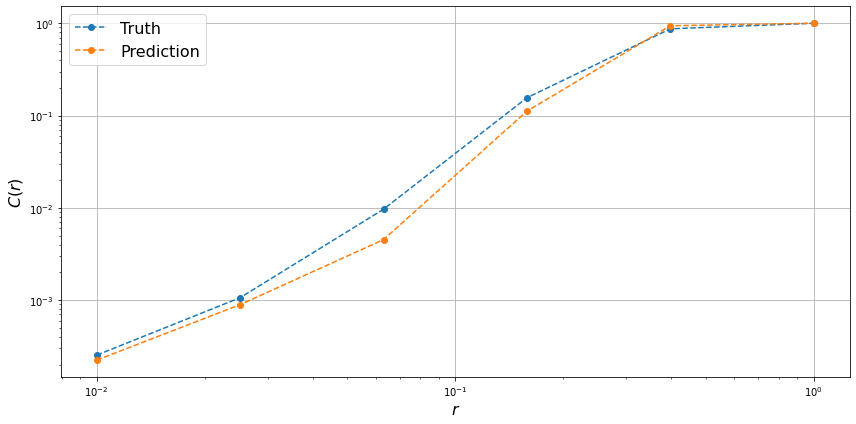

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.loglog(r_values, C_values, 'o--', label='Truth')
ax.loglog(r_values_ens, C_values_ens, 'o--', label='Prediction')
ax.set_xlabel(r'$r$', fontsize=16)
ax.set_ylabel(r'$C(r)$', fontsize=16)
ax.grid()
ax.legend(fontsize=16)
plt.tight_layout()
plt.savefig('correlation_integral.png', dpi=200)
plt.show()

# Section 2. Short-term prediction of laminarisation

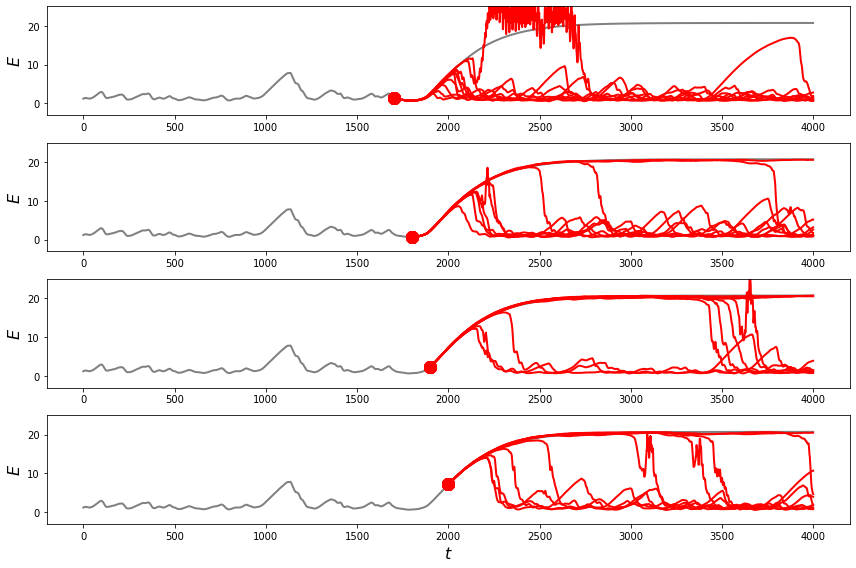

In [40]:
ke_original = m.kinetic_energy(training_timeseries[-4000:, :])

fig, axes = plt.subplots(4, 1, figsize=(12, 8))
for i, ax in enumerate(axes):
    ax.plot(range(len(ke_original)), ke_original, color='gray', linewidth=2)
    time_until_end = 2300 - i*100
    for ensemble_member_i in range(10):
        esn.synchronize(np.ones(synclen), training_timeseries[-time_until_end-synclen:-time_until_end, :])
        prediction_of_lam_event = esn.predict(np.ones(time_until_end))
        ke = m.kinetic_energy(prediction_of_lam_event)
        ax.plot(len(ke_original) - len(ke) + np.arange(len(ke)), ke, color='red', linewidth=2)
        ax.plot([len(ke_original) - len(ke)], [ke[0]], 'o', color='red', markersize=12)
    ax.set_ylim((-3, 25))
    ax.set_ylabel(r'$E$', fontsize=16)
axes[-1].set_xlabel(r'$t$', fontsize=16)
plt.tight_layout()
plt.savefig('prediction_of_laminarisation_when_lam_part_was_trained.png', dpi=200)
#gs.tight_layout(fig, rect=[0, 0, 1.5, 1.5])

plt.show()

# Section 3. Training without laminarisation part and then trying to predict it

In [42]:
def train_wo_laminarisation():
    trainlen = 12500
    synclen = 10
    predlen = 300
    testlen = synclen + predlen
    training_timeseries = data[:trainlen]
    test_timeseries_set = [data[trainlen + i*testlen: trainlen + (i+1)*testlen] for i in range(3)]
    spectral_radius_values = [0.5]
    sparsity_values = [0.1, 0.5, 0.9]
    esn = optimal_esn(training_timeseries, test_timeseries_set, 
                      spectral_radius_values=spectral_radius_values, 
                      sparsity_values=sparsity_values,
                      n_reservoir=1500)
    return esn

In [43]:
esn_wo_lam = train_wo_laminarisation()

Spectral radius = 0.5
	Sparsity = 0.1
		Trial #1
			New best ESN. Error = 0.1920665049515624, spectral radius = 0.5, sparsity = 0.1
		Trial #2
			New best ESN. Error = 0.1840571201426689, spectral radius = 0.5, sparsity = 0.1
		Trial #3
		Trial #4
		Trial #5
		Trial #6
		Trial #7
		Trial #8
		Trial #9
		Trial #10
	Sparsity = 0.5
		Trial #1
		Trial #2
		Trial #3
		Trial #4
		Trial #5
			New best ESN. Error = 0.18094964405441247, spectral radius = 0.5, sparsity = 0.5
		Trial #6
		Trial #7
		Trial #8
		Trial #9
		Trial #10
	Sparsity = 0.9
		Trial #1
		Trial #2
		Trial #3
		Trial #4
		Trial #5
			New best ESN. Error = 0.17677103062425298, spectral radius = 0.5, sparsity = 0.9
		Trial #6
		Trial #7
		Trial #8
		Trial #9
		Trial #10


In [19]:
def plot_training_and_test_sets_wo_laminarisation():
    trainlen = 12500
    synclen = 10
    predlen = 300
    testlen = synclen + predlen
    training_timeseries = data[:trainlen]
    test_timeseries_set = [data[trainlen + i*testlen: trainlen + (i+1)*testlen] for i in range(3)]

    fig, ax = plt.subplots(figsize=(12, 6))
    time_shift = 0.
    for i in range(3):
        times = time_shift + np.arange(test_timeseries_set[i].shape[0])
        ax.plot(times, test_timeseries_set[i][:, 0], linewidth=2, label=f'Test #{i + 1}')
        time_shift = times[-1]
    times = time_shift + np.arange(training_timeseries.shape[0])
    ax.plot(times, training_timeseries[:, 0], linewidth=2, label='Training')
    ax.set_xlabel(r'$t$', fontsize=16)
    ax.set_ylabel(r'$u_1$', fontsize=16)
    ax.legend(fontsize=14)
    ax.grid()
    plt.tight_layout()
    plt.savefig('timeseries_wo_lam.png', dpi=200)
    plt.show()

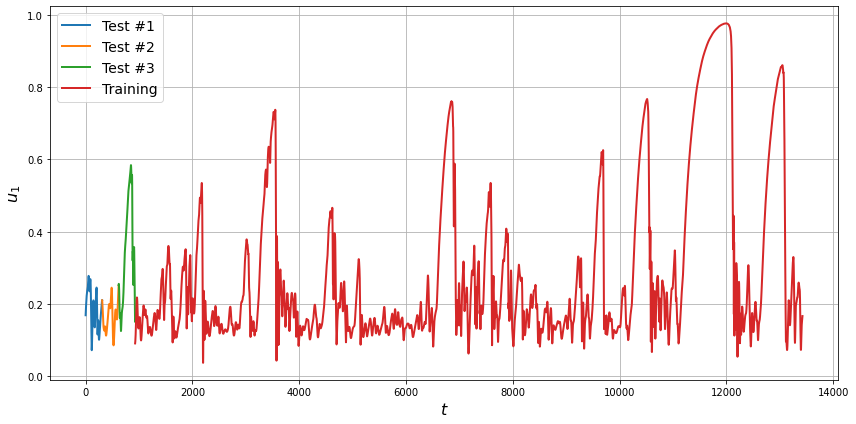

In [20]:
plot_training_and_test_sets_wo_laminarisation()

In [44]:
def plot_prediction_on_test_set(esn):
    fig, axes = plt.subplots(3, 1, figsize=(14, 9))
    for n in range(3):
        esn.synchronize(np.ones(synclen), test_timeseries_set[n][:synclen])
        prediction = esn.predict(np.ones(predlen))
        ke = m.kinetic_energy(prediction)
        ke_original = m.kinetic_energy(test_timeseries_set[n][synclen:synclen+predlen, :])
        axes[n].plot(range(len(ke)), ke, color='red', linewidth=3)
        axes[n].plot(range(len(ke_original)), ke_original, color='gray', linewidth=3)
        axes[n].set_ylabel(r'$E$', fontsize=16)
        axes[n].grid()
    axes[-1].set_xlabel(r'$t$', fontsize=16)
    plt.show()

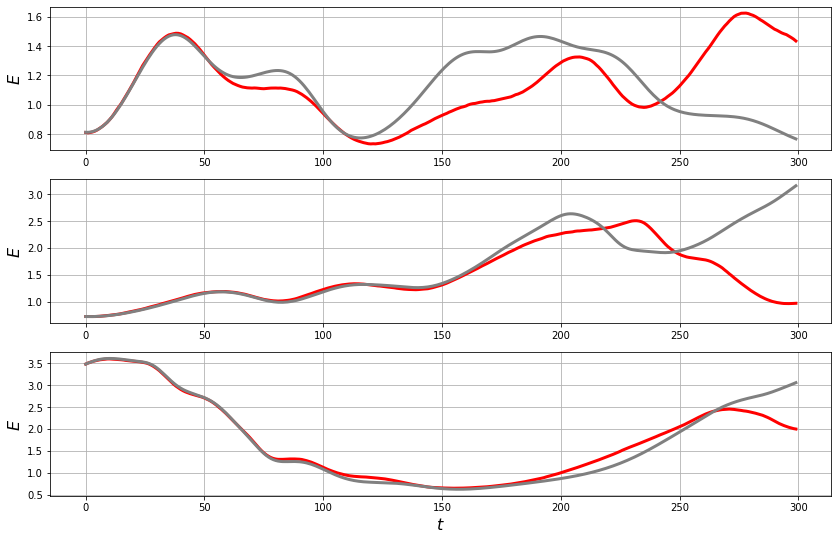

In [45]:
plot_prediction_on_test_set(esn_wo_lam)

In [46]:
def plot_prediction_of_lamiranisation_event(esn, name):
    ke_original = m.kinetic_energy(training_timeseries[-4000:, :])
    fig, axes = plt.subplots(4, 1, figsize=(12, 8))
    for i, ax in enumerate(axes):
        ax.plot(range(len(ke_original)), ke_original, color='gray', linewidth=2)
        time_until_end = 2300 - i*100
        for ensemble_member_i in range(10):
            esn.synchronize(np.ones(synclen), training_timeseries[-time_until_end-synclen:-time_until_end, :])
            prediction_of_lam_event = esn.predict(np.ones(time_until_end))
            ke = m.kinetic_energy(prediction_of_lam_event)
            ax.plot(len(ke_original) - len(ke) + np.arange(len(ke)), ke, color='red', linewidth=2)
            ax.plot([len(ke_original) - len(ke)], [ke[0]], 'o', color='red', markersize=12)
        ax.set_ylim((-3, 25))
        ax.set_ylabel(r'$E$', fontsize=16)
    axes[-1].set_xlabel(r'$t$', fontsize=16)
    plt.tight_layout()
    plt.savefig(name, dpi=200)
    #gs.tight_layout(fig, rect=[0, 0, 1.5, 1.5])
    plt.show()

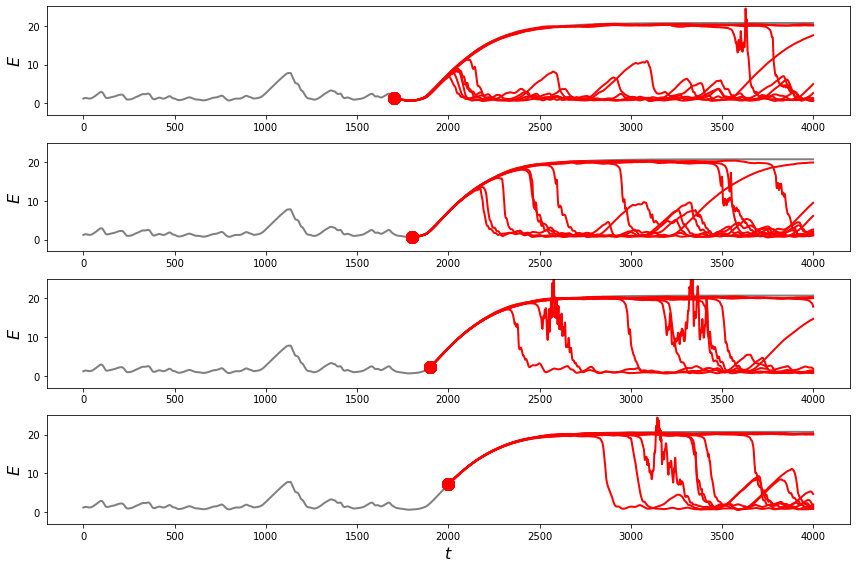

In [47]:
plot_prediction_of_lamiranisation_event(esn_wo_lam, 
                                        name='prediction_of_laminarisation_when_lam_part_was_not_trained.png')

In [50]:
import pickle
with open('esn_trained_wo_lam_event', 'wb') as f:
    pickle.dump(esn_wo_lam, f)
